# Welcome to this lovely notebook. Here we are going go through EDA and classification modeling parts parts on Vehicle insurance claims.
* The [link](https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection/data) to Kaggle page.


# Introduction

The dataset below contains records of insurance claims, some of which appeared to be fraudulent

<p><img src="https://d39w22sdzgge5f.cloudfront.net/wp-content/uploads/2021/09/Insurance-Fraud_EN-Blog-768x432.png" width="700" height="400"></p>

The following project is intended to have a walk through EDA with and then predicting whether a claim is or isn't fraudulent with several classification models.


The given dataset contains the following columns (33):

**fraud_claims.csv:**

&nbsp;&nbsp;&nbsp;&nbsp;**1. Month:** The month in which the insurance claim was made.  
&nbsp;&nbsp;&nbsp;&nbsp;**2. WeekOfMonth:** The week of the month in which the insurance claim was made.  
&nbsp;&nbsp;&nbsp;&nbsp;**3. DayOfWeek:** The day of the week on which the insurance claim was made.  
&nbsp;&nbsp;&nbsp;&nbsp;**4. Make:** The manufacturer of the vehicle involved in the claim.  
&nbsp;&nbsp;&nbsp;&nbsp;**5. AccidentArea:** The area where the accident occurred (e.g., urban, rural).  
&nbsp;&nbsp;&nbsp;&nbsp;**6. DayOfWeekClaimed:** The day of the week on which the insurance claim was processed.  
&nbsp;&nbsp;&nbsp;&nbsp;**7. MonthClaimed:** The month in which the insurance claim was processed.  
&nbsp;&nbsp;&nbsp;&nbsp;**8. WeekOfMonthClaimed:** The week of the month in which the insurance claim was processed.  
&nbsp;&nbsp;&nbsp;&nbsp;**9. Sex:** The gender of the policyholder.  
&nbsp;&nbsp;&nbsp;&nbsp;**10. MaritalStatus:** The marital status of the policyholder.  
&nbsp;&nbsp;&nbsp;&nbsp;**11. Age:** The age of the policyholder.  
&nbsp;&nbsp;&nbsp;&nbsp;**12. Fault:** Indicates whether the policyholder was at fault in the accident.  
&nbsp;&nbsp;&nbsp;&nbsp;**13. PolicyType:** The type of insurance policy (e.g., comprehensive, third-party).  
&nbsp;&nbsp;&nbsp;&nbsp;**14. VehicleCategory:** The category of the vehicle (e.g., sedan, SUV).  
&nbsp;&nbsp;&nbsp;&nbsp;**15. VehiclePrice:** The price of the vehicle.  
&nbsp;&nbsp;&nbsp;&nbsp;**16. FraudFound_P:** Indicates whether fraud was detected in the insurance claim.  
&nbsp;&nbsp;&nbsp;&nbsp;**17. PolicyNumber:** The unique identifier for the insurance policy.  
&nbsp;&nbsp;&nbsp;&nbsp;**18. RepNumber:** The unique identifier for the insurance representative handling the claim.  
&nbsp;&nbsp;&nbsp;&nbsp;**19. Deductible:** The amount that the policyholder must pay out of pocket before the insurance company pays the remaining costs.  
&nbsp;&nbsp;&nbsp;&nbsp;**20. DriverRating:** The rating of the driver, often based on driving history or other factors.  
&nbsp;&nbsp;&nbsp;&nbsp;**21. Days_Policy_Accident:** The number of days since the policy was issued until the accident occurred.  
&nbsp;&nbsp;&nbsp;&nbsp;**22. Days_Policy_Claim:** The number of days since the policy was issued until the claim was made.  
&nbsp;&nbsp;&nbsp;&nbsp;**23. PastNumberOfClaims:** The number of claims previously made by the policyholder.  
&nbsp;&nbsp;&nbsp;&nbsp;**24. AgeOfVehicle:** The age of the vehicle involved in the claim.  
&nbsp;&nbsp;&nbsp;&nbsp;**25. AgeOfPolicyHolder:** The age of the policyholder.  
&nbsp;&nbsp;&nbsp;&nbsp;**26. PoliceReportFiled:** Indicates whether a police report was filed for the accident.  
&nbsp;&nbsp;&nbsp;&nbsp;**27. WitnessPresent:** Indicates whether a witness was present at the scene of the accident.  
&nbsp;&nbsp;&nbsp;&nbsp;**28. AgentType:** The type of insurance agent handling the policy (e.g., internal, external).  
&nbsp;&nbsp;&nbsp;&nbsp;**29. NumberOfSuppliments:** The number of supplementary documents or claims related to the main claim, categorized into ranges.  
&nbsp;&nbsp;&nbsp;&nbsp;**30. AddressChange_Claim:** Indicates whether the address of the policyholder was changed at the time of the claim, categorized into ranges.  
&nbsp;&nbsp;&nbsp;&nbsp;**31. NumberOfCars:** The number of cars insured under the policy, categorized into ranges.  
&nbsp;&nbsp;&nbsp;&nbsp;**32. Year:** The year in which the claim was made or processed.  
&nbsp;&nbsp;&nbsp;&nbsp;**33. BasePolicy:** The base policy type (e.g., Liability, Collision, All Perils).  


# Goal
We need to predict which claims are found to be fraudulent.

In order to do it, we need to conduct EDA of the above-mentioned dataset, implement all the required manupulations with data, such as: imputation and transformation, dataprocessing in order to have data prepared for modeling.
Then implementing classification with several models (Decision Trees, XGBoost, SVM, Logistic Regression).

# The project will consist of the following parts (the following notebook contains EDA only):

1. Conducting EDA with documenting what we have in our data
2. Data preparation
3. Feature Selection
4. Feature Engineering
5. Modeling


In [1]:
#importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

# # Null Values
# import missingno as msno

# Visualization - Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 1. EDA

In [2]:
#Let's first read the file
car_claims = pd.read_csv('fraud_vihecles.csv')

In [3]:
car_claims.shape

(15420, 33)

In [4]:
# From the first sight there are no null values, but we'll take a look at it later, we have 15420 rows and 33 columns
car_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [5]:
# The base check shows no null values
car_claims.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [6]:
# Descriptive statistics for numerical columns
numerical_summary = car_claims.describe()

# Frequency distribution for categorical variables
categorical_summary = car_claims.describe(include=['object'])

In [7]:
# While checking the numerical summary a couple of weird things: Age 0, PolicyNumber - 1,
# we'll check that later on each column
numerical_summary

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [8]:
# After taking a look at the categorical columns we see 'none' in NumberOfSuppliments column, but we'll check the rest too.
categorical_summary

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,3,6,5,4,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,9671,8079,15247,15342,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


## 1.1 Numerical columns

### 1.1.1 FraudFound_P (aka Target)

In [9]:
# 2 Unique values
car_claims['FraudFound_P'].nunique()

2

In [10]:
# 1 and 0
car_claims['FraudFound_P'].unique()

array([0, 1], dtype=int64)

In [11]:
car_claims['FraudFound_P'].value_counts()

FraudFound_P
0    14497
1      923
Name: count, dtype: int64

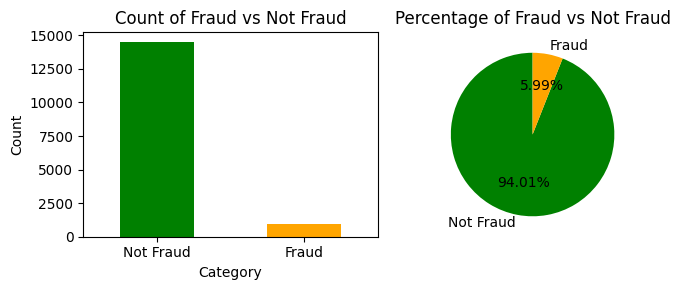

In [12]:
# Count values
count_fraud = car_claims['FraudFound_P'].value_counts().sort_index()
labels = ['Not Fraud', 'Fraud']

# Bar Chart for Counts
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
count_fraud.plot(kind='bar', color=['green', 'orange'])
plt.title('Count of Fraud vs Not Fraud')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)

# Pie Chart for Percentages
plt.subplot(1, 2, 2)
count_fraud.plot(kind='pie', labels=labels, autopct='%1.2f%%', colors=['green', 'orange'], startangle=90)
plt.title('Percentage of Fraud vs Not Fraud')
plt.ylabel('')

plt.tight_layout()
plt.show()

#### Observations
1. There is 6% fraudulent claims in our data, the number of fraud is 923 out of 15,420
2. We are dealing with imbalanced data

### 1.1.2 WeekOfMonth

In [13]:
# We have 5 unque values in this column
car_claims['WeekOfMonth'].nunique()

5

In [14]:
# values from 1 to 5 which could be considered as categorical
car_claims['WeekOfMonth'].unique()

array([5, 3, 2, 4, 1], dtype=int64)

In [15]:
car_claims['WeekOfMonth'].value_counts().sort_index()

WeekOfMonth
1    3187
2    3558
3    3640
4    3398
5    1637
Name: count, dtype: int64

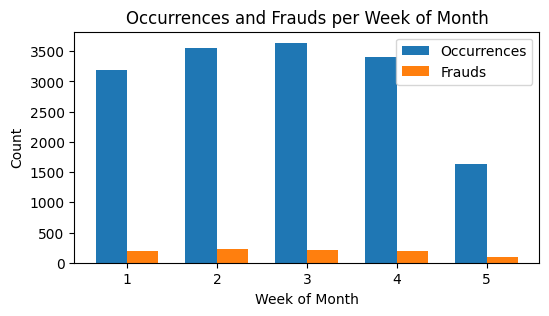

In [16]:
# Let's see the distribution of fraudulent claims for along with total count per week
# Aggregate data
occurrences = car_claims.groupby('WeekOfMonth').size()
frauds = car_claims.groupby('WeekOfMonth')['FraudFound_P'].sum()

# Combine into a single DataFrame for easier plotting
combined = pd.DataFrame({'Occurrences': occurrences, 'Frauds': frauds})

# Plotting
fig, ax = plt.subplots(figsize=(6, 3))

# Define the bar width and positions
bar_width = 0.35
index = combined.index

# Create the bars
bar1 = ax.bar(index, combined['Occurrences'], bar_width, label='Occurrences')
bar2 = ax.bar(index + bar_width, combined['Frauds'], bar_width, label='Frauds')

# Add labels and title
ax.set_xlabel('Week of Month')
ax.set_ylabel('Count')
ax.set_title('Occurrences and Frauds per Week of Month')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index)
ax.legend()

# Display the plot
plt.show()

#### Observations
1. Apparently the 5th week isn't full, it is what is left after the 4th week
2. We can't see any spike on a certain week

### 1.1.3 WeekOfMonthClaimed

In [17]:
# We have 5 unque values in this column
car_claims['WeekOfMonthClaimed'].nunique()

5

In [18]:
# values from 1 to 5 which could be considered as categorical
car_claims['WeekOfMonthClaimed'].unique()

array([1, 4, 2, 3, 5], dtype=int64)

In [19]:
car_claims['WeekOfMonthClaimed'].value_counts().sort_index()

WeekOfMonthClaimed
1    3450
2    3720
3    3583
4    3433
5    1234
Name: count, dtype: int64

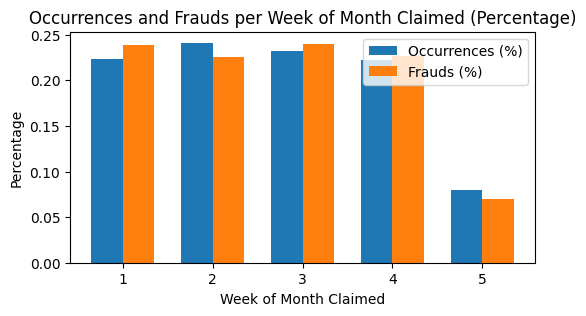

In [20]:
# Let's see the distribution of fraudulent claims for along with total count per week
# Aggregate data
occurrences = car_claims.groupby('WeekOfMonthClaimed').size()
frauds = car_claims.groupby('WeekOfMonthClaimed')['FraudFound_P'].sum()

# Calculate percentages
total_occurrences = occurrences.sum()
total_frauds = frauds.sum()

occurrences_percentage = (occurrences / total_occurrences)
frauds_percentage = (frauds / total_frauds)

# Combine into a single DataFrame for easier plotting
combined = pd.DataFrame({'Occurrences (%)': occurrences_percentage, 'Frauds (%)': frauds_percentage})

# Plotting
fig, ax = plt.subplots(figsize=(6, 3))

# Define the bar width and positions
bar_width = 0.35
index = combined.index

# Create the bars
bar1 = ax.bar(index, combined['Occurrences (%)'], bar_width, label='Occurrences (%)')
bar2 = ax.bar(index + bar_width, combined['Frauds (%)'], bar_width, label='Frauds (%)')

# Add labels and title
ax.set_xlabel('Week of Month Claimed')
ax.set_ylabel('Percentage')
ax.set_title('Occurrences and Frauds per Week of Month Claimed (Percentage)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(index)
ax.legend()

# Display the plot
plt.show()

#### Observations
1. Apparently the 5th week isn't full, it is what is left after the 4th week (similar to the previous one)
2. We can't see any spike on a certain week as well

### 1.1.4 Age

In [21]:
# We have 66 unque values in this column
car_claims['Age'].nunique()

66

In [22]:
# values from 0 to 80, 0 is not ligit, we need to check what's goint on here
print(np.sort(car_claims['Age'].unique()))

[ 0 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38
 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62
 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80]


In [23]:
# Let's take a look at the number of rows with Age 0
print(f"The number of rows with 0 out of total (15420) is: {car_claims[car_claims['Age']==0]['Age'].count()}")
print(f"The % of rows with 0 is: {round(car_claims[car_claims['Age']==0]['Age'].count()/15420, 2)}")

# Fraud in 0 rows
print(f"The number of rows with 0 and fraud is: \
{car_claims[(car_claims['Age']==0) & (car_claims['FraudFound_P']==1)]['Age'].count()}")

print(f"The % of rows with fraud in the rows with 0's is: \
{round(car_claims[(car_claims['Age']==0) & (car_claims['FraudFound_P']==1)]['Age'].count()/923, 2)}")

The number of rows with 0 out of total (15420) is: 320
The % of rows with 0 is: 0.02
The number of rows with 0 and fraud is: 31
The % of rows with fraud in the rows with 0's is: 0.03


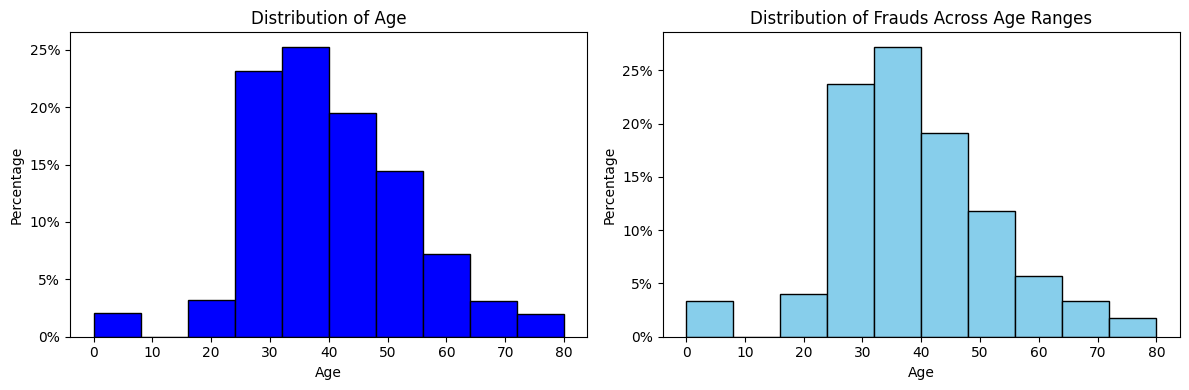

In [24]:
# Assuming car_claims is a DataFrame
ages = car_claims['Age']
fraud_ages = car_claims[car_claims['FraudFound_P'] == 1]['Age']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot the first histogram with percentages
age_counts, age_bins, _ = ax[0].hist(ages, bins=10, color='blue', edgecolor='black', weights=np.ones(len(ages)) / len(ages))
ax[0].set_title('Distribution of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Percentage')
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# Plot the second histogram with percentages
fraud_age_counts, fraud_age_bins, _ = ax[1].hist(fraud_ages, bins=10, color='skyblue', edgecolor='black', weights=np.ones(len(fraud_ages)) / len(fraud_ages))
ax[1].set_title('Distribution of Frauds Across Age Ranges')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Percentage')
ax[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

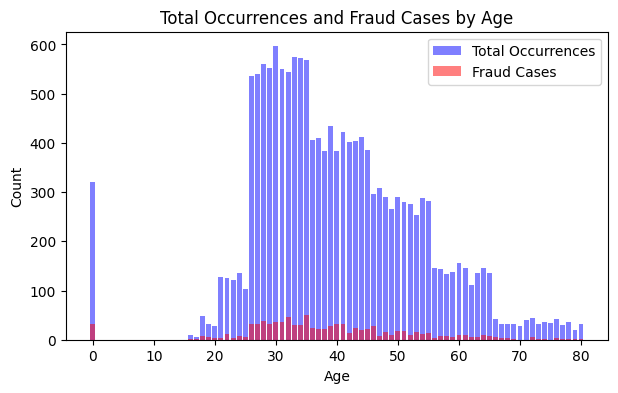

In [25]:
#After taking a look at the graph we can't say it is super indicative
# Count occurrences of each age
age_counts = car_claims['Age'].value_counts().sort_index()

# Count fraud cases for each age
fraud_counts = car_claims[car_claims['FraudFound_P'] == 1]['Age'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(7, 4))

# Plot total occurrences
plt.bar(age_counts.index, age_counts.values, alpha=0.5, label='Total Occurrences', color='blue')

# Plot fraud occurrences
plt.bar(fraud_counts.index, fraud_counts.values, alpha=0.5, label='Fraud Cases', color='red')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Total Occurrences and Fraud Cases by Age')
plt.legend()

# Display the plot
plt.show()

#### Observations
1. We have Ages of 0, not a lot but we need to think what to do with them
2. The distribution of Age looks exactly like the distribution of fraud per Age

### 1.1.5 PolicyNumber

In [26]:
# Ok, so finally we see a unique identifier, this column will be removed from the data while feeding the model
car_claims['PolicyNumber'].nunique()

15420

In [27]:
car_claims['PolicyNumber'].unique()

array([    1,     2,     3, ..., 15418, 15419, 15420], dtype=int64)

### 1.1.6 RepNumber

In [28]:
# 16 unique values
car_claims['RepNumber'].nunique()

16

In [29]:
car_claims['RepNumber'].unique()

array([12, 15,  7,  4,  3, 14,  1, 13, 11, 16,  6,  2,  8,  5,  9, 10],
      dtype=int64)

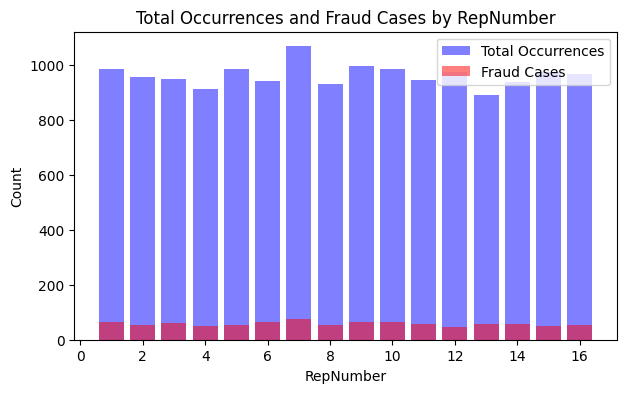

In [30]:
# Count occurrences of each age
rep_number_counts = car_claims['RepNumber'].value_counts().sort_index()

# Count fraud cases for each age
fraud_counts_rep = car_claims[car_claims['FraudFound_P'] == 1]['RepNumber'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(7, 4))

# Plot total occurrences
plt.bar(rep_number_counts.index, rep_number_counts.values, alpha=0.5, label='Total Occurrences', color='blue')

# Plot fraud occurrences
plt.bar(fraud_counts_rep.index, fraud_counts_rep.values, alpha=0.5, label='Fraud Cases', color='red')

# Adding labels and title
plt.xlabel('RepNumber')
plt.ylabel('Count')
plt.title('Total Occurrences and Fraud Cases by RepNumber')
plt.legend()

# Display the plot
plt.show()

#### Observations
1. The distribution of fraud looks to be quite similar for all the RepNumbers.
2. It's quite unclear if this feature can be useful

### 1.1.7 Deductible

In [31]:
# We have 4 unque values in this column
car_claims['Deductible'].nunique()

4

In [32]:
# So the values that we have are 300, 400, 500 and 700
car_claims['Deductible'].unique()

array([300, 400, 500, 700], dtype=int64)

In [33]:
# As we can see 400 takes up most of the claims
# counts
deductible = car_claims['Deductible'].value_counts().to_frame().sort_index()
deductible['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('Deductible')['FraudFound_P'].count()

#fraud
deductible['%_of_total'] = deductible['count'].apply(lambda x: round(x/deductible['count'].sum(),2))
deductible['%_of_fraud'] = deductible['fraud_count'].apply(lambda x: round(x/deductible['fraud_count'].sum(),2))


deductible

,count,fraud_count,%_of_total,%_of_fraud
Deductible,,,,
300,8,2,0.00,0.00
400,14838,856,0.96,0.93
500,263,47,0.02,0.05
700,311,18,0.02,0.02


#### Observations
1. Most of the data represented by 400 value, 96%
2. The distribution of fraud looks pretty similar

### 1.1.8 DriverRating

In [34]:
# We have 4 unque values in this column
car_claims['DriverRating'].nunique()

4

In [35]:
# So the values that we have are 1, 2, 3 and 4
car_claims['DriverRating'].unique()

array([1, 4, 3, 2], dtype=int64)

In [36]:
# counts
driverrating = car_claims['DriverRating'].value_counts().to_frame().sort_index()
driverrating['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('DriverRating')['FraudFound_P'].count()

#fraud
driverrating['%_of_total'] = driverrating['count'].apply(lambda x: round(x/driverrating['count'].sum(),2))
driverrating['%_of_fraud'] = driverrating['fraud_count'].apply(lambda x: round(x/driverrating['fraud_count'].sum(),2))

driverrating

,count,fraud_count,%_of_total,%_of_fraud
DriverRating,,,,
1,3944,232,0.26,0.25
2,3801,214,0.25,0.23
3,3884,242,0.25,0.26
4,3791,235,0.25,0.25


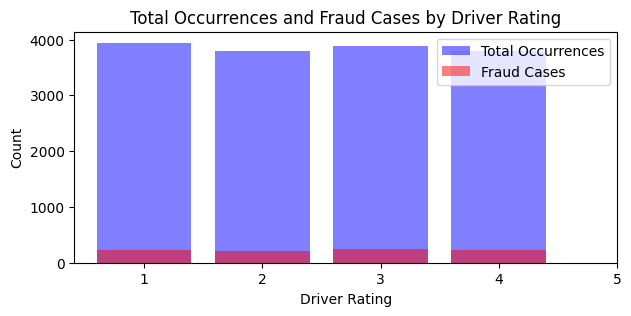

In [37]:
# Plotting
fig, ax1 = plt.subplots(figsize=(7, 3))

# Plot total occurrences
ax1.bar(driverrating.index, driverrating['count'], alpha=0.5, label='Total Occurrences', color='blue')

# Plot fraud occurrences
ax1.bar(driverrating.index, driverrating['fraud_count'], alpha=0.5, label='Fraud Cases', color='red')

# Adding labels and title
ax1.set_xlabel('Driver Rating')
ax1.set_ylabel('Count')
ax1.set_title('Total Occurrences and Fraud Cases by Driver Rating')
ax1.set_xticks(index)
ax1.legend()

# Display the plot
plt.show()

#### Observations
1. 4 DriverRating category
2. The distribution of fraud looks pretty similar for each category

### 1.1.9 Year

In [38]:
# We have 3 unque values in this column
car_claims['Year'].nunique()

3

In [39]:
# So the values that we have are 1994, 1995, 1996
car_claims['Year'].unique()

array([1994, 1995, 1996], dtype=int64)

In [40]:
# counts
year = car_claims['Year'].value_counts().to_frame().sort_index()
year['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('Year')['FraudFound_P'].count()

#fraud
year['%_of_total'] = year['count'].apply(lambda x: round(x/year['count'].sum(),2))
year['%_of_fraud'] = year['fraud_count'].apply(lambda x: round(x/year['fraud_count'].sum(),2))

year

,count,fraud_count,%_of_total,%_of_fraud
Year,,,,
1994,6142,409,0.40,0.44
1995,5195,301,0.34,0.33
1996,4083,213,0.26,0.23


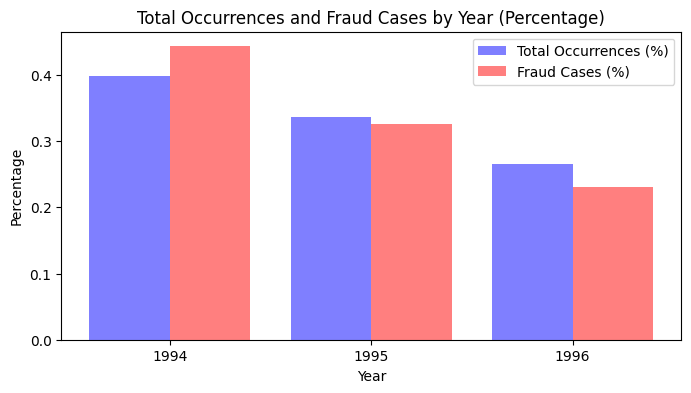

In [41]:
# Calculate percentages
year['count_percentage'] = (year['count'] / year['count'].sum())
year['fraud_percentage'] = (year['fraud_count'] / year['fraud_count'].sum())

# Plotting
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot total occurrences percentages
ax1.bar(year.index, year['count_percentage'], alpha=0.5, label='Total Occurrences (%)', color='blue', width=0.4)

# Plot fraud occurrences percentages
ax1.bar(year.index + 0.4, year['fraud_percentage'], alpha=0.5, label='Fraud Cases (%)', color='red', width=0.4)

# Adding labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage')
ax1.set_title('Total Occurrences and Fraud Cases by Year (Percentage)')
ax1.legend()

# Ensuring x-axis shows whole numbers
ax1.set_xticks(year.index + 0.2)
ax1.set_xticklabels(year.index, rotation=0)

# Display the plot
plt.show()

#### Observations
1. 3 distinct years
2. no spikes but the number of occurencies goes down along with the years and fraud

## 1.2 Categorical columns

### 1.2.1 Month

In [42]:
# We have 12 unque values in this column
car_claims['Month'].nunique()

12

In [43]:
# ok so We have all 12 months
car_claims['Month'].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
       'Jul', 'May', 'Sep'], dtype=object)

In [44]:
# The distribution for each month doesn't really look different
# counts
month = car_claims['Month'].value_counts().to_frame().sort_index()
month['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('Month')['FraudFound_P'].count()

#fraud
month['%_of_total'] = month['count'].apply(lambda x: round(x/month['count'].sum(),2))
month['%_of_fraud'] = month['fraud_count'].apply(lambda x: round(x/month['fraud_count'].sum(),2))

month

,count,fraud_count,%_of_total,%_of_fraud
Month,,,,
Apr,1280,80,0.08,0.09
Aug,1127,84,0.07,0.09
Dec,1285,62,0.08,0.07
Feb,1266,82,0.08,0.09
Jan,1411,87,0.09,0.09
Jul,1257,60,0.08,0.07
Jun,1321,80,0.09,0.09
Mar,1360,102,0.09,0.11
May,1367,94,0.09,0.10


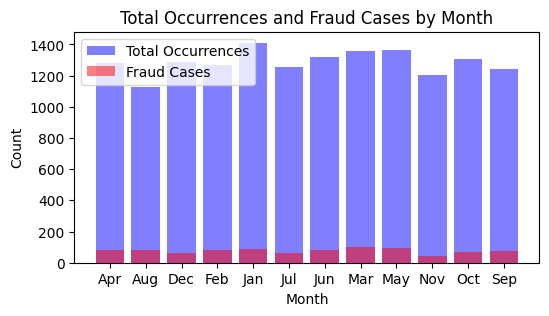

In [45]:
# Plotting
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot total occurrences
ax1.bar(month.index, month['count'], alpha=0.5, label='Total Occurrences', color='blue')

# Plot fraud occurrences
ax1.bar(month.index, month['fraud_count'], alpha=0.5, label='Fraud Cases', color='red')

# Adding labels and title
ax1.set_xlabel('Month')
ax1.set_ylabel('Count')
ax1.set_title('Total Occurrences and Fraud Cases by Month')
ax1.legend()

# Ensuring x-axis shows whole numbers
ax1.set_xticks(month.index)
ax1.set_xticklabels(month.index, rotation=0)

# Display the plot
plt.show()

#### Observations
1. All 12 Months
2. no spikes. It looks like maybe we could create a new feature named Season, We'll see

### 1.2.2 DayOfWeek

In [46]:
# We have 7 unque values in this column
car_claims['DayOfWeek'].nunique()

7

In [47]:
# ok so We have all 7 days
car_claims['DayOfWeek'].unique()

array(['Wednesday', 'Friday', 'Saturday', 'Monday', 'Tuesday', 'Sunday',
       'Thursday'], dtype=object)

In [48]:
# The distribution for each month doesn't really look different
# counts
day = car_claims['DayOfWeek'].value_counts().to_frame().sort_index()
day['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('DayOfWeek')['FraudFound_P'].count()

#fraud
day['%_of_total'] = day['count'].apply(lambda x: round(x/day['count'].sum(),2))
day['%_of_fraud'] = day['fraud_count'].apply(lambda x: round(x/day['fraud_count'].sum(),2))

day

,count,fraud_count,%_of_total,%_of_fraud
DayOfWeek,,,,
Friday,2445,154,0.16,0.17
Monday,2616,160,0.17,0.17
Saturday,1982,132,0.13,0.14
Sunday,1745,122,0.11,0.13
Thursday,2173,120,0.14,0.13
Tuesday,2300,120,0.15,0.13
Wednesday,2159,115,0.14,0.12


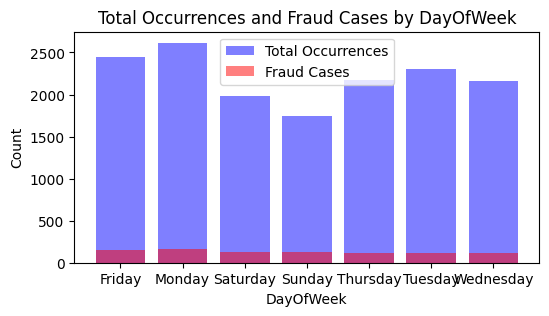

In [49]:
# Plotting
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot total occurrences
ax1.bar(day.index, day['count'], alpha=0.5, label='Total Occurrences', color='blue')

# Plot fraud occurrences
ax1.bar(day.index, day['fraud_count'], alpha=0.5, label='Fraud Cases', color='red')

# Adding labels and title
ax1.set_xlabel('DayOfWeek')
ax1.set_ylabel('Count')
ax1.set_title('Total Occurrences and Fraud Cases by DayOfWeek')
ax1.legend()

# Ensuring x-axis shows whole numbers
ax1.set_xticks(day.index)
ax1.set_xticklabels(day.index, rotation=0)

# Display the plot
plt.show()

#### Observations
1. All 7 days
2. no spikes. The distribution looks equal throughout the days

### 1.2.3 Make

In [50]:
# We have 19 unque values in this column
car_claims['Make'].nunique()

19

In [51]:
# ok so We have all 19 days
car_claims['Make'].unique()

array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
       'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
       'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
      dtype=object)

In [52]:
# The distribution for each month doesn't really look different
# counts
make = car_claims['Make'].value_counts().to_frame().sort_values(by='count', ascending=False)
make['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('Make')['FraudFound_P'].count()

#fraud
make['%_of_total'] = make['count'].apply(lambda x: round(x/make['count'].sum(),2))
make['%_of_fraud'] = make['fraud_count'].apply(lambda x: round(x/make['fraud_count'].sum(),2))
make['cumulative_sum_fraud'] = np.cumsum(make['%_of_fraud'])
make['cumulative_sum_total'] = np.cumsum(make['count'])
make['cumulative_%_total'] = np.cumsum(make['%_of_total'])

make

,count,fraud_count,%_of_total,%_of_fraud,cumulative_sum_fraud,cumulative_sum_total,cumulative_%_total
Make,,,,,,,
Pontiac,3837,213.0,0.25,0.23,0.23,3837,0.25
Toyota,3121,186.0,0.20,0.20,0.43,6958,0.45
Honda,2801,179.0,0.18,0.19,0.62,9759,0.63
Mazda,2354,123.0,0.15,0.13,0.75,12113,0.78
Chevrolet,1681,94.0,0.11,0.10,0.85,13794,0.89
Accura,472,59.0,0.03,0.06,0.91,14266,0.92
Ford,450,33.0,0.03,0.04,0.95,14716,0.95
VW,283,8.0,0.02,0.01,0.96,14999,0.97
Dodge,109,2.0,0.01,0.00,0.96,15108,0.98


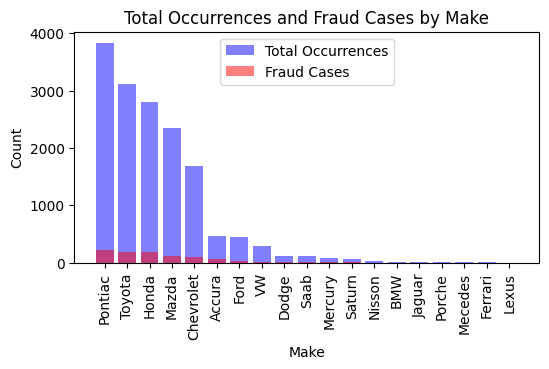

In [53]:
# Plotting
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot total occurrences
ax1.bar(make.index, make['count'], alpha=0.5, label='Total Occurrences', color='blue')

# Plot fraud occurrences
ax1.bar(make.index, make['fraud_count'], alpha=0.5, label='Fraud Cases', color='red')

# Adding labels and title
ax1.set_xlabel('Make')
ax1.set_ylabel('Count')
ax1.set_title('Total Occurrences and Fraud Cases by Make')
ax1.legend()

# Ensuring x-axis shows whole numbers
ax1.set_xticks(make.index)
ax1.set_xticklabels(make.index, rotation=90)

# Display the plot
plt.show()

#### Observations
1. We have 19 distinct makes
2. Some vehicles are presented with low quantities and therefore low fraud, others have high fraud. We'll think what to do with it later

### 1.2.4 AccidentArea

In [54]:
# We have 2 unque values in this column
car_claims['AccidentArea'].nunique()

2

In [55]:
# ok so We have only Urban and Rural areas
car_claims['AccidentArea'].unique()

array(['Urban', 'Rural'], dtype=object)

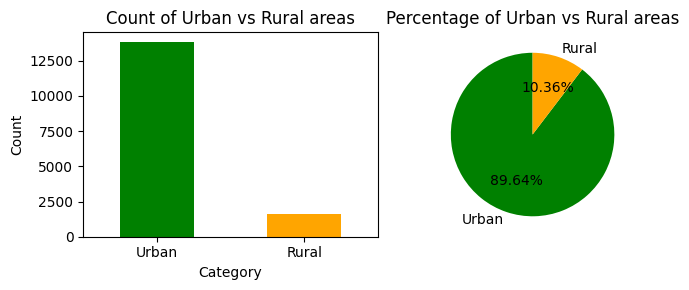

In [56]:
# Count values
count_area = car_claims['AccidentArea'].value_counts()
labels = ['Urban', 'Rural']

# Bar Chart for Counts
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
count_area.plot(kind='bar', color=['green', 'orange'])
plt.title('Count of Urban vs Rural areas')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=labels, rotation=0)

# Pie Chart for Percentages
plt.subplot(1, 2, 2)
count_area.plot(kind='pie', labels=labels, autopct='%1.2f%%', colors=['green', 'orange'], startangle=90)
plt.title('Percentage of Urban vs Rural areas')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [57]:
count_area

AccidentArea
Urban    13822
Rural     1598
Name: count, dtype: int64

In [58]:
# counts
area = car_claims['AccidentArea'].value_counts().to_frame().sort_index()
area['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('AccidentArea')['FraudFound_P'].count()

#fraud
area['%_of_total'] = area['count'].apply(lambda x: round(x/area['count'].sum(),2))
area['%_of_fraud'] = area['fraud_count'].apply(lambda x: round(x/area['fraud_count'].sum(),2))

area

,count,fraud_count,%_of_total,%_of_fraud
AccidentArea,,,,
Rural,1598,133,0.1,0.14
Urban,13822,790,0.9,0.86


#### Observations
1. We have 2 areas, 90% is taken up by Urban
2. The fraud is distributed almost the same

### 1.2.5 DayOfWeekClaimed

In [59]:
# We have 8 unque values in this column, which is weird
car_claims['DayOfWeekClaimed'].nunique()

8

In [60]:
# ok so We have all 8 days
car_claims['DayOfWeekClaimed'].unique()

array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
       'Sunday', '0'], dtype=object)

In [61]:
# counts
day_claimed = car_claims['DayOfWeekClaimed'].value_counts().to_frame()
day_claimed['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('DayOfWeekClaimed')['FraudFound_P'].count()

#fraud
day_claimed['%_of_total'] = day_claimed['count'].apply(lambda x: round(x/day_claimed['count'].sum(),2))
day_claimed['%_of_fraud'] = day_claimed['fraud_count'].apply(lambda x: round(x/day_claimed['fraud_count'].sum(),2))

day_claimed

,count,fraud_count,%_of_total,%_of_fraud
DayOfWeekClaimed,,,,
Monday,3757,216.0,0.24,0.23
Tuesday,3375,198.0,0.22,0.21
Wednesday,2951,188.0,0.19,0.20
Thursday,2660,144.0,0.17,0.16
Friday,2497,164.0,0.16,0.18
Saturday,127,10.0,0.01,0.01
Sunday,52,3.0,0.00,0.00
0,1,NaN,0.00,NaN


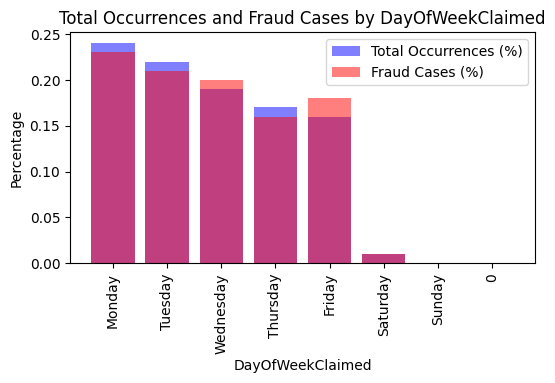

In [62]:
# Plotting
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot total occurrences
ax1.bar(day_claimed.index, day_claimed['%_of_total'], alpha=0.5, label='Total Occurrences (%)', color='blue')

# Plot fraud occurrences
ax1.bar(day_claimed.index, day_claimed['%_of_fraud'], alpha=0.5, label='Fraud Cases (%)', color='red')

# Adding labels and title
ax1.set_xlabel('DayOfWeekClaimed')
ax1.set_ylabel('Percentage')
ax1.set_title('Total Occurrences and Fraud Cases by DayOfWeekClaimed')
ax1.legend()

# Ensuring x-axis shows whole numbers
ax1.set_xticks(day_claimed.index)
ax1.set_xticklabels(day_claimed.index, rotation=90)

# Display the plot
plt.show()

#### Observations
1. We have to take care of the 0 row
2. The least clames are made on Saturday and Sunday
3. There is a decrease in the number of claims from Monday to Friday, so is in fraud

### 1.2.6 MonthClaimed

In [160]:
# We have 13 unque values in this column, and 0 which is weird
car_claims['MonthClaimed'].nunique()

13

In [161]:
# ok so We have all 13 days
car_claims['MonthClaimed'].unique()

array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
       'Jun', 'Sep', 'Oct', '0'], dtype=object)

In [162]:
# counts
month_claimed = car_claims['MonthClaimed'].value_counts().to_frame()
month_claimed['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('MonthClaimed')['FraudFound_P'].count()

#fraud
month_claimed['%_of_total'] = month_claimed['count'].apply(lambda x: round(x/month_claimed['count'].sum(),2))
month_claimed['%_of_fraud'] = month_claimed['fraud_count'].apply(lambda x: round(x/month_claimed['fraud_count'].sum(),2))

month_claimed

,count,fraud_count,%_of_total,%_of_fraud
MonthClaimed,,,,
Jan,1446,92.0,0.09,0.10
May,1411,102.0,0.09,0.11
Mar,1348,97.0,0.09,0.11
Oct,1339,73.0,0.09,0.08
Jun,1293,78.0,0.08,0.08
Feb,1287,78.0,0.08,0.08
Nov,1285,46.0,0.08,0.05
Apr,1271,82.0,0.08,0.09
Sep,1242,78.0,0.08,0.08


In [164]:
# Define the correct order for the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert MonthClaimed to a categorical type with the correct order
car_claims['MonthClaimed'] = pd.Categorical(car_claims['MonthClaimed'], categories=month_order, ordered=True)

# Calculate counts
month_claimed = car_claims['MonthClaimed'].value_counts().reindex(month_order).to_frame(name='count')
month_claimed['fraud_count'] = car_claims[car_claims['FraudFound_P'] == 1].groupby('MonthClaimed')['FraudFound_P'].count().reindex(month_order)

# Fill NaN values with 0 for fraud_count
month_claimed['fraud_count'].fillna(0, inplace=True)

# Calculate percentages
month_claimed['%_of_total'] = month_claimed['count'].apply(lambda x: round(x / month_claimed['count'].sum(), 2))
month_claimed['%_of_fraud'] = month_claimed['fraud_count'].apply(lambda x: round(x / month_claimed['fraud_count'].sum(), 2))

C:\Users\atans\AppData\Local\Temp\ipykernel_27624\2892173661.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_claimed['fraud_count'] = car_claims[car_claims['FraudFound_P'] == 1].groupby('MonthClaimed')['FraudFound_P'].count().reindex(month_order)
C:\Users\atans\AppData\Local\Temp\ipykernel_27624\2892173661.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inpla

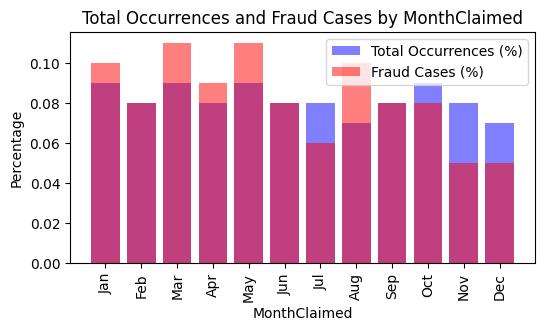

In [165]:
# Plotting
fig, ax1 = plt.subplots(figsize=(6, 3))

# Plot total occurrences
ax1.bar(month_claimed.index, month_claimed['%_of_total'], alpha=0.5, label='Total Occurrences (%)', color='blue')

# Plot fraud occurrences
ax1.bar(month_claimed.index, month_claimed['%_of_fraud'], alpha=0.5, label='Fraud Cases (%)', color='red')

# Adding labels and title
ax1.set_xlabel('MonthClaimed')
ax1.set_ylabel('Percentage')
ax1.set_title('Total Occurrences and Fraud Cases by MonthClaimed')
ax1.legend()

# Ensuring x-axis shows whole numbers
ax1.set_xticks(month_claimed.index)
ax1.set_xticklabels(month_claimed.index, rotation=90)

# Display the plot
plt.show()

#### Observations
1. We have to take care of the 0 row
2. August has the least clames but is one of the fraudulent months
3. July is also one of the lowest months in terms of claims and also in terms of fraud
4. Looks like the spring months are the most fraudulent and the winter months are the least

### 1.2.7 Sex

In [67]:
# We have 2 unque values in this column
car_claims['Sex'].nunique()

2

In [68]:
# ok so We have all 2 genders
car_claims['Sex'].unique()

array(['Female', 'Male'], dtype=object)

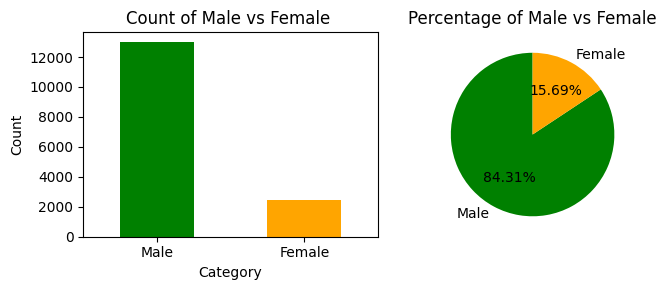

In [69]:
# Count values
sex = car_claims['Sex'].value_counts()
sex_labels = ['Male', 'Female']

# Bar Chart for Counts
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
sex.plot(kind='bar', color=['green', 'orange'])
plt.title('Count of Male vs Female ')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=sex_labels, rotation=0)

# Pie Chart for Percentages
plt.subplot(1, 2, 2)
sex.plot(kind='pie', labels=sex_labels, autopct='%1.2f%%', colors=['green', 'orange'], startangle=90)
plt.title('Percentage of Male vs Female')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [70]:
# counts
sex = car_claims['Sex'].value_counts().to_frame().sort_index()
sex['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('Sex')['FraudFound_P'].count()

#fraud
sex['%_of_total'] = sex['count'].apply(lambda x: round(x/sex['count'].sum(),2))
sex['%_of_fraud'] = sex['fraud_count'].apply(lambda x: round(x/sex['fraud_count'].sum(),2))

sex

,count,fraud_count,%_of_total,%_of_fraud
Sex,,,,
Female,2420,105,0.16,0.11
Male,13000,818,0.84,0.89


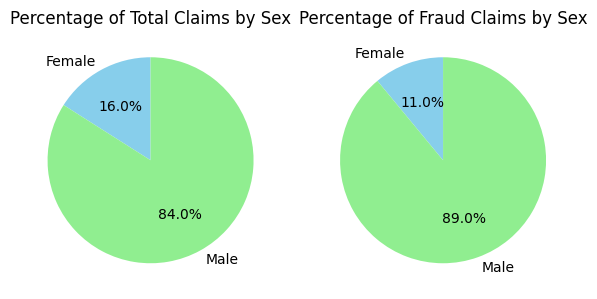

In [71]:
# Plotting pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

# Pie chart for % per male and female
ax1.pie(sex['%_of_total'], labels=sex.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
ax1.set_title('Percentage of Total Claims by Sex')

# Pie chart for % of fraud per male and female
ax2.pie(sex['%_of_fraud'], labels=sex.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
ax2.set_title('Percentage of Fraud Claims by Sex')

# Display the plots
plt.tight_layout()
plt.show()

#### Observations
1. We have two classes, males and females
2. Males take up 84% of the data and 89% of fraudulent claims

### 1.2.8 MaritalStatus

In [72]:
# We have 4 unique values
car_claims['MaritalStatus'].nunique()

4

In [73]:
# ok so We have all 4 values
car_claims['MaritalStatus'].unique()

array(['Single', 'Married', 'Widow', 'Divorced'], dtype=object)

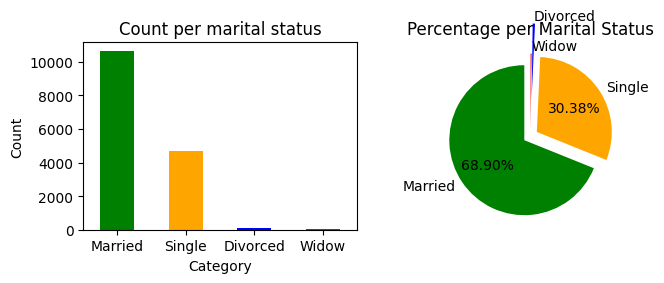

In [74]:
# Count values
marital_status = car_claims['MaritalStatus'].value_counts()
ms_labels = ['Married', 'Single', 'Divorced', 'Widow']

# Bar Chart for Counts
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
marital_status.plot(kind='bar', color=['green', 'orange', 'blue', 'red'])
plt.title('Count per marital status')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=ms_labels, rotation=0)

# Custom function to display percentages
def autopct_func(pct):
    return ('%1.2f%%' % pct) if pct > 1 else ''

# Pie Chart for Percentages
plt.subplot(1, 2, 2)
explode = (0.1, 0.1, 0.5, 0.1)  # Adjust as needed for better separation
marital_status.plot(kind='pie', labels=ms_labels, autopct=autopct_func, colors=['green', 'orange', 'blue', 'red'], startangle=90, explode=explode)
plt.title('Percentage per Marital Status')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [75]:
car_claims['MaritalStatus'].value_counts(normalize=True)

MaritalStatus
Married     0.689040
Single      0.303761
Divorced    0.004929
Widow       0.002270
Name: proportion, dtype: float64

In [76]:
# counts
ms = car_claims['MaritalStatus'].value_counts().to_frame().sort_index()
ms['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('MaritalStatus')['FraudFound_P'].count()

#fraud
ms['%_of_total'] = ms['count'].apply(lambda x: round(x/ms['count'].sum(),4))
ms['%_of_fraud'] = ms['fraud_count'].apply(lambda x: round(x/ms['fraud_count'].sum(),4))

ms

,count,fraud_count,%_of_total,%_of_fraud
MaritalStatus,,,,
Divorced,76,3,0.0049,0.0033
Married,10625,639,0.6890,0.6923
Single,4684,278,0.3038,0.3012
Widow,35,3,0.0023,0.0033


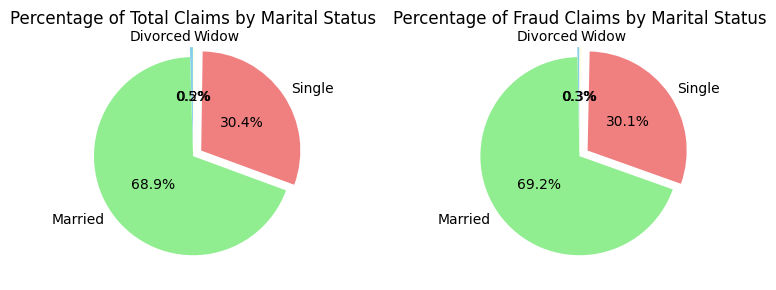

In [77]:
# Define a function to explode small slices
def get_explode(sizes, threshold=0.5, explode_factor=0.1):
    return [explode_factor if size < threshold else 0 for size in sizes]

# Plotting pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

# Colors for the pie charts
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow']

# Calculate explode parameters
explode_total = get_explode(ms['%_of_total'])
explode_fraud = get_explode(ms['%_of_fraud'])

# Pie chart for % per marital status
ax1.pie(ms['%_of_total'], labels=ms.index, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.5, explode=explode_total)
ax1.set_title('Percentage of Total Claims by Marital Status')

# Pie chart for % of fraud per marital status
ax2.pie(ms['%_of_fraud'], labels=ms.index, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.5, explode=explode_fraud)
ax2.set_title('Percentage of Fraud Claims by Marital Status')

# Display the plots
plt.tight_layout()
plt.show()

#### Observations
1. We have 4 classes: Married, Single, Divorced and Widow
2. Married takes up almost 68.9% of the data, together with Single it is 99.27%
3. We also see that the distribution of total count and fraud look the same

### 1.2.9 Fault

In [78]:
# We have 2 unique values
car_claims['Fault'].nunique()

2

In [79]:
# ok so We have all 2 values
car_claims['Fault'].unique()

array(['Policy Holder', 'Third Party'], dtype=object)

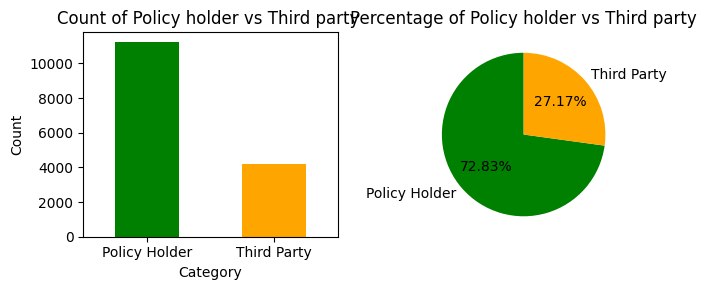

In [80]:
# Count values
fault = car_claims['Fault'].value_counts()
fault_labels = ['Policy Holder', 'Third Party']

# Bar Chart for Counts
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
fault.plot(kind='bar', color=['green', 'orange'])
plt.title('Count of Policy holder vs Third party ')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=fault_labels, rotation=0)

# Pie Chart for Percentages
plt.subplot(1, 2, 2)
fault.plot(kind='pie', labels=fault_labels, autopct='%1.2f%%', colors=['green', 'orange'], startangle=90)
plt.title('Percentage of Policy holder vs Third party')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [81]:
# counts
fault = car_claims['Fault'].value_counts().to_frame().sort_index()
fault['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('Fault')['FraudFound_P'].count()

#fraud
fault['%_of_total'] = fault['count'].apply(lambda x: round(x/fault['count'].sum(),2))
fault['%_of_fraud'] = fault['fraud_count'].apply(lambda x: round(x/fault['fraud_count'].sum(),2))

fault

,count,fraud_count,%_of_total,%_of_fraud
Fault,,,,
Policy Holder,11230,886,0.73,0.96
Third Party,4190,37,0.27,0.04


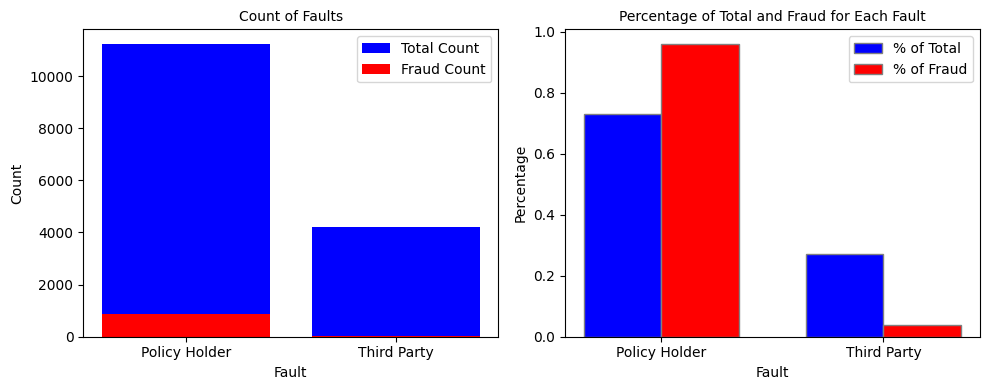

In [82]:
# Plotting
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Font size
font_size = 10

# Bar plot for the count of each fault
ax[0].bar(fault.index, fault['count'], color='blue', label='Total Count')
ax[0].bar(fault.index, fault['fraud_count'], color='red', label='Fraud Count')
ax[0].set_title('Count of Faults', fontsize=font_size)
ax[0].set_xlabel('Fault', fontsize=font_size)
ax[0].set_ylabel('Count', fontsize=font_size)
ax[0].legend(fontsize=font_size)
ax[0].tick_params(axis='x', labelsize=font_size)
ax[0].tick_params(axis='y', labelsize=font_size)

# Bar plot for the percentage of total and fraud
bar_width = 0.35
r1 = range(len(fault))
r2 = [x + bar_width for x in r1]

ax[1].bar(r1, fault['%_of_total'], color='blue', width=bar_width, edgecolor='grey', label='% of Total')
ax[1].bar(r2, fault['%_of_fraud'], color='red', width=bar_width, edgecolor='grey', label='% of Fraud')

ax[1].set_title('Percentage of Total and Fraud for Each Fault', fontsize=font_size)
ax[1].set_xlabel('Fault', fontsize=font_size)
ax[1].set_ylabel('Percentage', fontsize=font_size)
ax[1].set_xticks([r + bar_width / 2 for r in range(len(fault))])
ax[1].set_xticklabels(fault.index, fontsize=font_size)
ax[1].legend(fontsize=font_size)
ax[1].tick_params(axis='x', labelsize=font_size)
ax[1].tick_params(axis='y', labelsize=font_size)

plt.tight_layout()
plt.show()

#### Observations
1. We have 2 classes: Policy Holder and Third Party
2. Policy Holder takes up 73% by count, but interestingly 96% of fraudulent claims

### 1.2.10 PolicyType

In [83]:
# We have 9 unique values
car_claims['PolicyType'].nunique()

9

In [84]:
# ok so We have all 9 values
car_claims['PolicyType'].unique()

array(['Sport - Liability', 'Sport - Collision', 'Sedan - Liability',
       'Utility - All Perils', 'Sedan - All Perils', 'Sedan - Collision',
       'Utility - Collision', 'Utility - Liability', 'Sport - All Perils'],
      dtype=object)

In [85]:
# counts
pt = car_claims['PolicyType'].value_counts().to_frame()
pt['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('PolicyType')['FraudFound_P'].count()

#fraud
pt['%_of_total'] = pt['count'].apply(lambda x: round(x/pt['count'].sum(),2))
pt['%_of_fraud'] = pt['fraud_count'].apply(lambda x: round(x/pt['fraud_count'].sum(),2))

pt

,count,fraud_count,%_of_total,%_of_fraud
PolicyType,,,,
Sedan - Collision,5584,384.0,0.36,0.42
Sedan - Liability,4987,36.0,0.32,0.04
Sedan - All Perils,4087,411.0,0.27,0.45
Sport - Collision,348,48.0,0.02,0.05
Utility - All Perils,340,41.0,0.02,0.04
Utility - Collision,30,3.0,0.00,0.00
Sport - All Perils,22,NaN,0.00,NaN
Utility - Liability,21,NaN,0.00,NaN
Sport - Liability,1,NaN,0.00,NaN


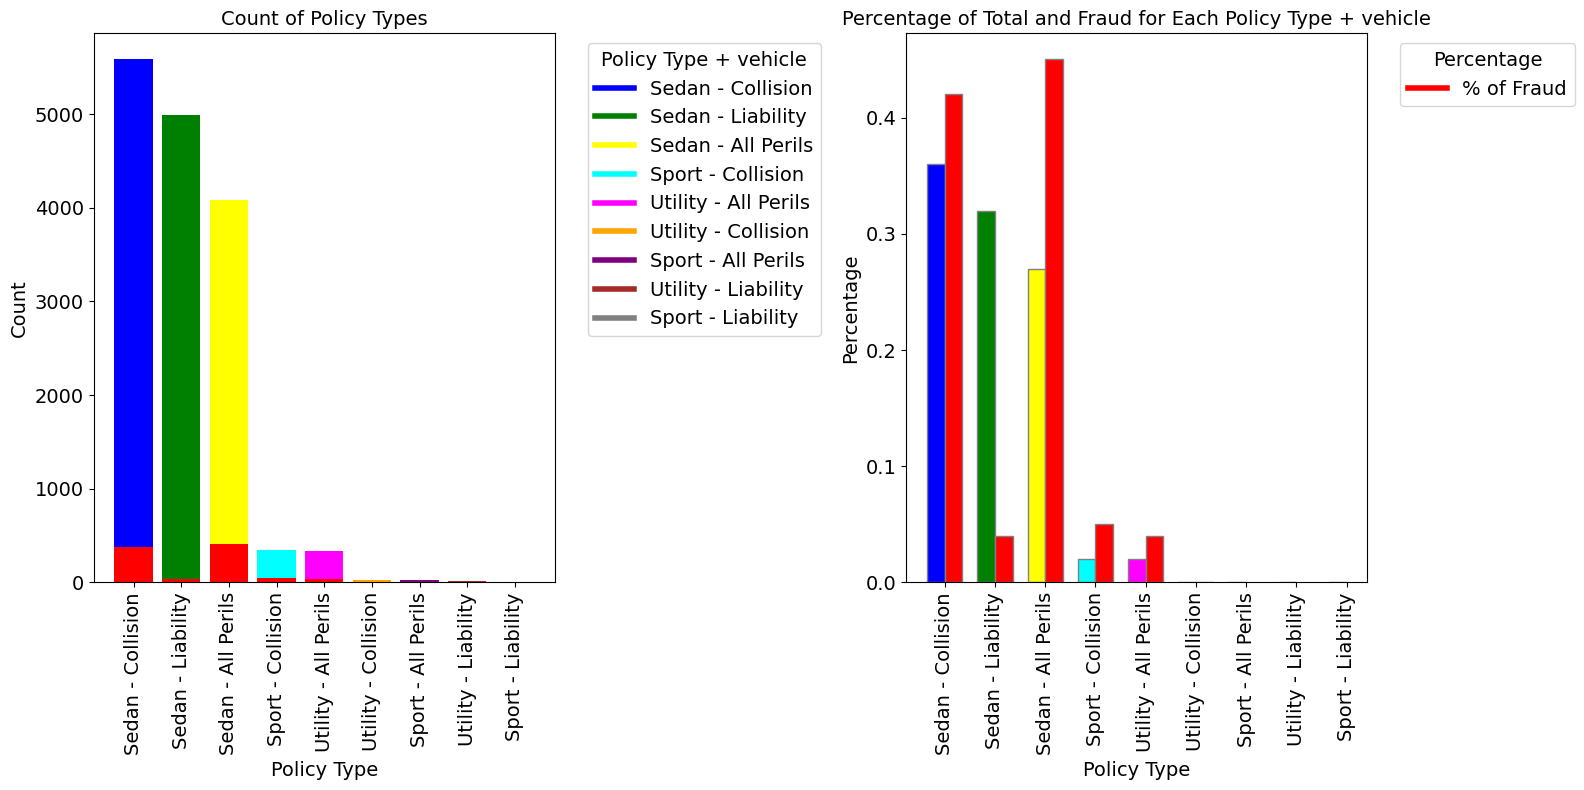

In [86]:
policy_colors = ['blue', 'green', 'yellow', 'cyan', 'magenta', 'orange', 'purple', 'brown', 'grey']
fraud_color = 'red'

# Font size
font_size = 14

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Bar plot for the count of each policy type
for i, (index, row) in enumerate(pt.iterrows()):
    ax[0].bar(index, row['count'], color=policy_colors[i % len(policy_colors)], label=index)
    ax[0].bar(index, row['fraud_count'], color=fraud_color)

ax[0].set_title('Count of Policy Types', fontsize=font_size)
ax[0].set_xlabel('Policy Type', fontsize=font_size)
ax[0].set_ylabel('Count', fontsize=font_size)
ax[0].tick_params(axis='x', rotation=90, labelsize=font_size)  # Rotate x-ticks by 90 degrees
ax[0].tick_params(axis='y', labelsize=font_size)

# Create custom legend handles
legend_handles = [plt.Line2D([0], [0], color=color, lw=4) for color in policy_colors[:len(pt.index)]]
legend_labels = pt.index

ax[0].legend(legend_handles, legend_labels, title='Policy Type + vehicle', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=font_size, title_fontsize=font_size)

# Bar plot for the percentage of total and fraud
bar_width = 0.35
r1 = range(len(pt))
r2 = [x + bar_width for x in r1]

for i, index in enumerate(pt.index):
    ax[1].bar(r1[i], pt.loc[index, '%_of_total'], color=policy_colors[i % len(policy_colors)], width=bar_width, edgecolor='grey')
    ax[1].bar(r2[i], pt.loc[index, '%_of_fraud'], color=fraud_color, width=bar_width, edgecolor='grey')

ax[1].set_title('Percentage of Total and Fraud for Each Policy Type + vehicle', fontsize=font_size)
ax[1].set_xlabel('Policy Type', fontsize=font_size)
ax[1].set_ylabel('Percentage', fontsize=font_size)
ax[1].set_xticks([r + bar_width / 2 for r in range(len(pt))])
ax[1].set_xticklabels(pt.index, fontsize=font_size)
ax[1].tick_params(axis='x', rotation=90, labelsize=font_size)
ax[1].tick_params(axis='y', labelsize=font_size)

# Manually create legend for % of Fraud with red color
fraud_patch = plt.Line2D([0], [0], color=fraud_color, lw=4)
ax[1].legend([fraud_patch], ['% of Fraud'], title='Percentage', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=font_size, title_fontsize=font_size)

plt.tight_layout()
plt.show()


#### Observations
1. We have 9 classes
2. 3 of them are most frequent ones: Sedan - Collision, Sedan - Liability, Sedan - All Perils
3. Two classes are explicitly fraudulent: Sedan - Collision and Sedan - All Perils, they take up 87% of all fraud

### 1.2.11 VehicleCategory

In [87]:
# We have 3 unique values
car_claims['VehicleCategory'].nunique()

3

In [88]:
# ok so We have all 3 values
car_claims['VehicleCategory'].unique()

array(['Sport', 'Utility', 'Sedan'], dtype=object)

In [89]:
# counts
vc = car_claims['VehicleCategory'].value_counts().to_frame().sort_index()
vc['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('VehicleCategory')['FraudFound_P'].count()

#fraud
vc['%_of_total'] = vc['count'].apply(lambda x: round(x/vc['count'].sum(),2))
vc['%_of_fraud'] = vc['fraud_count'].apply(lambda x: round(x/vc['fraud_count'].sum(),2))

vc

,count,fraud_count,%_of_total,%_of_fraud
VehicleCategory,,,,
Sedan,9671,795,0.63,0.86
Sport,5358,84,0.35,0.09
Utility,391,44,0.03,0.05


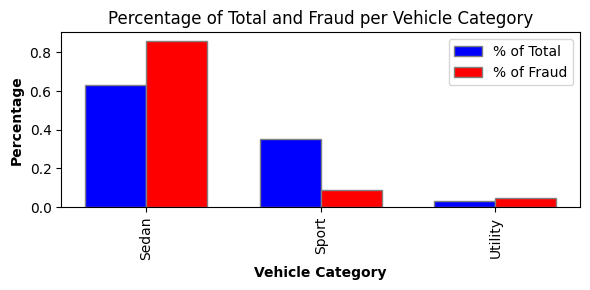

In [90]:
# Define bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = range(len(vc))
r2 = [x + bar_width for x in r1]

# Plotting
fig, ax = plt.subplots(figsize=(6, 3))

# Bar plot for the percentage of total
ax.bar(r1, vc['%_of_total'], color='blue', width=bar_width, edgecolor='grey', label='% of Total')

# Bar plot for the percentage of fraud
ax.bar(r2, vc['%_of_fraud'], color='red', width=bar_width, edgecolor='grey', label='% of Fraud')

# Adding labels and title
ax.set_xlabel('Vehicle Category', fontweight='bold')
ax.set_ylabel('Percentage', fontweight='bold')
ax.set_title('Percentage of Total and Fraud per Vehicle Category')
ax.set_xticks([r + bar_width / 2 for r in range(len(vc))])
ax.set_xticklabels(vc.index)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

#### Observations
1. We have 3 classes
2. Sedan takes up 63% of total data but 86 % of total fraud
3. Sport takes up 35% of total data but 9 % of total fraud
4. Utility takes up 3% of total data and 5% of total fraud

### 1.2.12 VehiclePrice

In [91]:
# We have 3 unique values
car_claims['VehiclePrice'].nunique()

6

In [92]:
# ok so We have all 3 values
car_claims['VehiclePrice'].unique()

array(['more than 69000', '20000 to 29000', '30000 to 39000',
       'less than 20000', '40000 to 59000', '60000 to 69000'],
      dtype=object)

In [93]:
# counts
vp = car_claims['VehiclePrice'].value_counts().to_frame()
vp['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('VehiclePrice')['FraudFound_P'].count()

#fraud
vp['%_of_total'] = vp['count'].apply(lambda x: round(x/vp['count'].sum(),2))
vp['%_of_fraud'] = vp['fraud_count'].apply(lambda x: round(x/vp['fraud_count'].sum(),2))

vp

,count,fraud_count,%_of_total,%_of_fraud
VehiclePrice,,,,
20000 to 29000,8079,421,0.52,0.46
30000 to 39000,3533,175,0.23,0.19
more than 69000,2164,189,0.14,0.20
less than 20000,1096,103,0.07,0.11
40000 to 59000,461,31,0.03,0.03
60000 to 69000,87,4,0.01,0.00


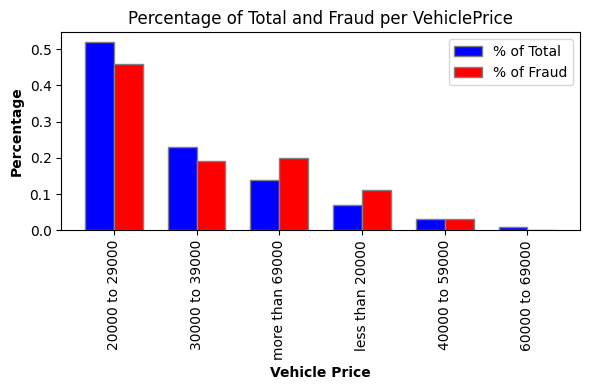

In [94]:
# Define bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = range(len(vp))
r2 = [x + bar_width for x in r1]

# Plotting
fig, ax = plt.subplots(figsize=(6, 4))

# Bar plot for the percentage of total
ax.bar(r1, vp['%_of_total'], color='blue', width=bar_width, edgecolor='grey', label='% of Total')

# Bar plot for the percentage of fraud
ax.bar(r2, vp['%_of_fraud'], color='red', width=bar_width, edgecolor='grey', label='% of Fraud')

# Adding labels and title
ax.set_xlabel('Vehicle Price', fontweight='bold')
ax.set_ylabel('Percentage', fontweight='bold')
ax.set_title('Percentage of Total and Fraud per VehiclePrice')
ax.set_xticks([r + bar_width / 2 for r in range(len(vp))])
ax.set_xticklabels(vp.index)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

#### Observations
1. We have 6 price ranges
2. 20000 to 29000 is the most represented and fraudulent as well (46% of total fraud falls on this class)
3. 30000 to 39000 is the second best in terms of representetiveness and fraud (19% of total froad falls on this class)
4. more than 69000 is presented less than 20% of the cases but is quite fraudulent (20% of total fraud is here)

### 1.2.13 Days_Policy_Accident

In [95]:
# We have 5 unique values
car_claims['Days_Policy_Accident'].nunique()

5

In [96]:
# ok so We have all 5 values
car_claims['Days_Policy_Accident'].unique()

array(['more than 30', '15 to 30', 'none', '1 to 7', '8 to 15'],
      dtype=object)

In [97]:
# counts
dpa = car_claims['Days_Policy_Accident'].value_counts().to_frame()
dpa['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('Days_Policy_Accident')['FraudFound_P'].count()

#fraud
dpa['%_of_total'] = dpa['count'].apply(lambda x: round(x/dpa['count'].sum(),2))
dpa['%_of_fraud'] = dpa['fraud_count'].apply(lambda x: round(x/dpa['fraud_count'].sum(),2))

dpa

,count,fraud_count,%_of_total,%_of_fraud
Days_Policy_Accident,,,,
more than 30,15247,905,0.99,0.98
none,55,9,0.00,0.01
8 to 15,55,5,0.00,0.01
15 to 30,49,3,0.00,0.00
1 to 7,14,1,0.00,0.00


#### Observations
1. The column has 5 values
2. more than 30 takes up 99% of the data and 98% of the total fraud

### 1.2.14 Days_Policy_Claim

In [98]:
# We have 4 unique values
car_claims['Days_Policy_Claim'].nunique()

4

In [99]:
# ok so We have all 4 values
car_claims['Days_Policy_Claim'].unique()

array(['more than 30', '15 to 30', '8 to 15', 'none'], dtype=object)

In [100]:
# counts
dpc = car_claims['Days_Policy_Claim'].value_counts().to_frame()
dpc['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('Days_Policy_Claim')['FraudFound_P'].count()

#fraud
dpc['%_of_total'] = dpc['count'].apply(lambda x: round(x/dpc['count'].sum(),2))
dpc['%_of_fraud'] = dpc['fraud_count'].apply(lambda x: round(x/dpc['fraud_count'].sum(),2))

dpc

,count,fraud_count,%_of_total,%_of_fraud
Days_Policy_Claim,,,,
more than 30,15342,914.0,0.99,0.99
15 to 30,56,6.0,0.00,0.01
8 to 15,21,3.0,0.00,0.00
none,1,NaN,0.00,NaN


#### Observations
1. The column has 4 values
2. more than 30 takes up 99% of the data and 99% of the total fraud

### 1.2.15 PastNumberOfClaims

In [101]:
# We have 4 unique values
car_claims['PastNumberOfClaims'].nunique()

4

In [102]:
# ok so We have all 4 values
car_claims['PastNumberOfClaims'].unique()

array(['none', '1', '2 to 4', 'more than 4'], dtype=object)

In [103]:
# counts
pnoc = car_claims['PastNumberOfClaims'].value_counts().to_frame()
pnoc['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('PastNumberOfClaims')['FraudFound_P'].count()

#fraud
pnoc['%_of_total'] = pnoc['count'].apply(lambda x: round(x/pnoc['count'].sum(),2))
pnoc['%_of_fraud'] = pnoc['fraud_count'].apply(lambda x: round(x/pnoc['fraud_count'].sum(),2))

pnoc

,count,fraud_count,%_of_total,%_of_fraud
PastNumberOfClaims,,,,
2 to 4,5485,294,0.36,0.32
none,4352,339,0.28,0.37
1,3573,222,0.23,0.24
more than 4,2010,68,0.13,0.07


#### Observations
1. The column has 4 values
2. From 2 to 4 takes up 36% of data and 32% of total fraud
3. none takes up 28% of rows with 37% of total fraud (highest fraud)
4. 1 takes up 13% of rows with 7% of total fraud

### 1.2.16 AgeOfVehicle

In [104]:
# We have 4 unique values
car_claims['AgeOfVehicle'].nunique()

8

In [105]:
# ok so We have all 4 values
car_claims['AgeOfVehicle'].unique()

array(['3 years', '6 years', '7 years', 'more than 7', '5 years', 'new',
       '4 years', '2 years'], dtype=object)

In [106]:
# counts
aov = car_claims['AgeOfVehicle'].value_counts().to_frame()
aov['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('AgeOfVehicle')['FraudFound_P'].count()

#fraud
aov['%_of_total'] = aov['count'].apply(lambda x: round(x/aov['count'].sum(),2))
aov['%_of_fraud'] = aov['fraud_count'].apply(lambda x: round(x/aov['fraud_count'].sum(),2))

aov

,count,fraud_count,%_of_total,%_of_fraud
AgeOfVehicle,,,,
7 years,5807,325,0.38,0.35
more than 7,3981,206,0.26,0.22
6 years,3448,228,0.22,0.25
5 years,1357,95,0.09,0.10
new,373,32,0.02,0.03
4 years,229,21,0.01,0.02
3 years,152,13,0.01,0.01
2 years,73,3,0.00,0.00


#### Observations
1. The column has 8 values
2. 7 yo vehicles take up 38% of the data with 35% of total fraud
3. The rest of the data looks proportionate, the older the vehicle the more fraud there is

### 1.2.17 AgeOfPolicyHolder

In [107]:
# We have 9 unique values
car_claims['AgeOfPolicyHolder'].nunique()

9

In [108]:
# ok so We have all 9 values
car_claims['AgeOfPolicyHolder'].unique()

array(['26 to 30', '31 to 35', '41 to 50', '51 to 65', '21 to 25',
       '36 to 40', '16 to 17', 'over 65', '18 to 20'], dtype=object)

In [109]:
# counts
aoph = car_claims['AgeOfPolicyHolder'].value_counts().to_frame()
aoph['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('AgeOfPolicyHolder')['FraudFound_P'].count()

#fraud
aoph['%_of_total'] = aoph['count'].apply(lambda x: round(x/aoph['count'].sum(),2))
aoph['%_of_fraud'] = aoph['fraud_count'].apply(lambda x: round(x/aoph['fraud_count'].sum(),2))

aoph

,count,fraud_count,%_of_total,%_of_fraud
AgeOfPolicyHolder,,,,
31 to 35,5593,360,0.36,0.39
36 to 40,4043,237,0.26,0.26
41 to 50,2828,144,0.18,0.16
51 to 65,1392,70,0.09,0.08
26 to 30,613,33,0.04,0.04
over 65,508,30,0.03,0.03
16 to 17,320,31,0.02,0.03
21 to 25,108,16,0.01,0.02
18 to 20,15,2,0.00,0.00


#### Observations
1. The column has 9 values
2. The age group 31 to 35 takes up 36% of the rows and 39% of total fraud
3. 36 to 40 and 41 to 50 take up 26% of rows, 26% of fraud and 18% of rows, 16% of fraud respectively
4. The 3 above-mentioned groups take up 80% of rows by count and 81% of total fraud

### 1.2.18 PoliceReportFiled

In [110]:
# We have 2 unique values
car_claims['PoliceReportFiled'].nunique()

2

In [111]:
# ok so We have all 2 values
car_claims['PoliceReportFiled'].unique()

array(['No', 'Yes'], dtype=object)

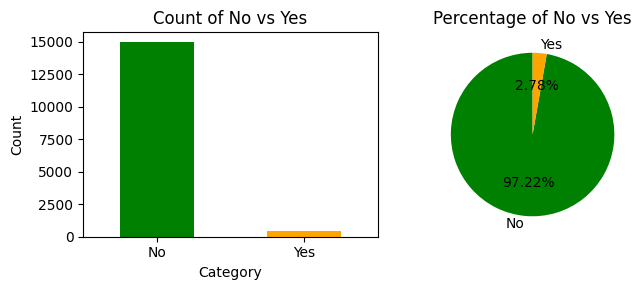

In [112]:
# Count values
prf = car_claims['PoliceReportFiled'].value_counts()
prf_labels = ['No', 'Yes']

# Bar Chart for Counts
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
prf.plot(kind='bar', color=['green', 'orange'])
plt.title('Count of No vs Yes')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=prf_labels, rotation=0)

# Pie Chart for Percentages
plt.subplot(1, 2, 2)
prf.plot(kind='pie', labels=prf_labels, autopct='%1.2f%%', colors=['green', 'orange'], startangle=90)
plt.title('Percentage of No vs Yes')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [113]:
# counts
prf = car_claims['PoliceReportFiled'].value_counts().to_frame()
prf['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('PoliceReportFiled')['FraudFound_P'].count()

#fraud
prf['%_of_total'] = prf['count'].apply(lambda x: round(x/prf['count'].sum(),2))
prf['%_of_fraud'] = prf['fraud_count'].apply(lambda x: round(x/prf['fraud_count'].sum(),2))

prf

,count,fraud_count,%_of_total,%_of_fraud
PoliceReportFiled,,,,
No,14992,907,0.97,0.98
Yes,428,16,0.03,0.02


#### Observations
1. The column has 2 values
2. No police appeared in 97% cases which contains 98% of total fraud

### 1.2.19 WitnessPresent

In [114]:
# We have 2 unique values
car_claims['WitnessPresent'].nunique()

2

In [115]:
# ok so We have all 2 values
car_claims['WitnessPresent'].unique()

array(['No', 'Yes'], dtype=object)

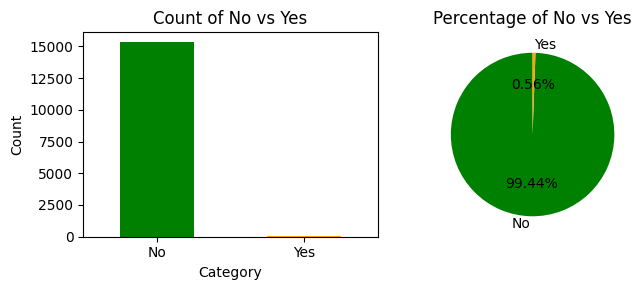

In [116]:
# Count values
wp = car_claims['WitnessPresent'].value_counts()
wp_labels = ['No', 'Yes']

# Bar Chart for Counts
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
wp.plot(kind='bar', color=['green', 'orange'])
plt.title('Count of No vs Yes')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=wp_labels, rotation=0)

# Pie Chart for Percentages
plt.subplot(1, 2, 2)
wp.plot(kind='pie', labels=wp_labels, autopct='%1.2f%%', colors=['green', 'orange'], startangle=90)
plt.title('Percentage of No vs Yes')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [117]:
# counts
wp = car_claims['WitnessPresent'].value_counts().to_frame()
wp['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('WitnessPresent')['FraudFound_P'].count()

#fraud
wp['%_of_total'] = wp['count'].apply(lambda x: round(x/wp['count'].sum(),2))
wp['%_of_fraud'] = wp['fraud_count'].apply(lambda x: round(x/wp['fraud_count'].sum(),2))

wp

,count,fraud_count,%_of_total,%_of_fraud
WitnessPresent,,,,
No,15333,920,0.99,1.0
Yes,87,3,0.01,0.0


#### Observations
1. The column has 2 values
2. No witnesses presented in 99.44% of the cases which represents almost 100% fraud of total

### 1.2.20 AgentType

In [118]:
# We have 2 unique values
car_claims['AgentType'].nunique()

2

In [119]:
# ok so We have all 2 values
car_claims['AgentType'].unique()

array(['External', 'Internal'], dtype=object)

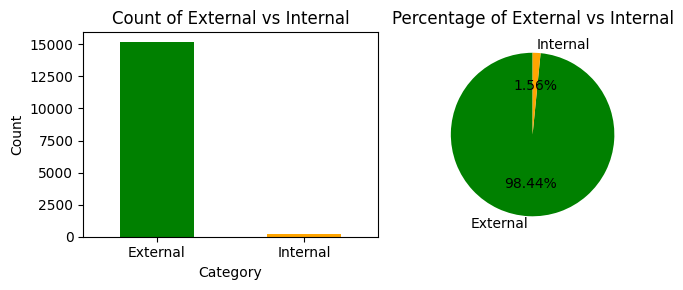

In [120]:
# Count values
at = car_claims['AgentType'].value_counts()
at_labels = ['External', 'Internal']

# Bar Chart for Counts
plt.figure(figsize=(7, 3))

plt.subplot(1, 2, 1)
at.plot(kind='bar', color=['green', 'orange'])
plt.title('Count of External vs Internal')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=at_labels, rotation=0)

# Pie Chart for Percentages
plt.subplot(1, 2, 2)
at.plot(kind='pie', labels=at_labels, autopct='%1.2f%%', colors=['green', 'orange'], startangle=90)
plt.title('Percentage of External vs Internal')
plt.ylabel('')

plt.tight_layout()
plt.show()

In [121]:
# counts
at = car_claims['AgentType'].value_counts().to_frame()
at['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('AgentType')['FraudFound_P'].count()

#fraud
at['%_of_total'] = at['count'].apply(lambda x: round(x/at['count'].sum(),2))
at['%_of_fraud'] = at['fraud_count'].apply(lambda x: round(x/at['fraud_count'].sum(),2))

at

,count,fraud_count,%_of_total,%_of_fraud
AgentType,,,,
External,15179,919,0.98,1.0
Internal,241,4,0.02,0.0


#### Observations
1. The column has 2 values
2. External agents are in 98.44% of the cases represent almost 100% of fraudulent claims

### 1.2.21 NumberOfSuppliments

In [122]:
# We have 4 unique values
car_claims['NumberOfSuppliments'].nunique()

4

In [123]:
# ok so We have all 4 values
car_claims['NumberOfSuppliments'].unique()

array(['none', 'more than 5', '3 to 5', '1 to 2'], dtype=object)

In [124]:
# counts
nos = car_claims['NumberOfSuppliments'].value_counts().to_frame()
nos['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('NumberOfSuppliments')['FraudFound_P'].count()

#fraud
nos['%_of_total'] = nos['count'].apply(lambda x: round(x/nos['count'].sum(),2))
nos['%_of_fraud'] = nos['fraud_count'].apply(lambda x: round(x/nos['fraud_count'].sum(),2))

nos

,count,fraud_count,%_of_total,%_of_fraud
NumberOfSuppliments,,,,
none,7047,472,0.46,0.51
more than 5,3867,195,0.25,0.21
1 to 2,2489,159,0.16,0.17
3 to 5,2017,97,0.13,0.11


#### Observations
1. The column has 4 values
2. none value takes up 46% of rows with 51% of total fraud
3. The rest is quite proportional

### 1.2.22 AddressChange_Claim

In [125]:
# We have 5 unique values
car_claims['AddressChange_Claim'].nunique()

5

In [126]:
# ok so We have all 5 values
car_claims['AddressChange_Claim'].unique()

array(['1 year', 'no change', '4 to 8 years', '2 to 3 years',
       'under 6 months'], dtype=object)

In [127]:
# counts
acc = car_claims['AddressChange_Claim'].value_counts().to_frame()
acc['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('AddressChange_Claim')['FraudFound_P'].count()

#fraud
acc['%_of_total'] = acc['count'].apply(lambda x: round(x/acc['count'].sum(),2))
acc['%_of_fraud'] = acc['fraud_count'].apply(lambda x: round(x/acc['fraud_count'].sum(),2))

acc

,count,fraud_count,%_of_total,%_of_fraud
AddressChange_Claim,,,,
no change,14324,825,0.93,0.89
4 to 8 years,631,33,0.04,0.04
2 to 3 years,291,51,0.02,0.06
1 year,170,11,0.01,0.01
under 6 months,4,3,0.00,0.00


#### Observations
1. The column has 5 values
2. no change takes up 93% of the data and 89% of total fraud
3. The rest is quite proportional

### 1.2.23 NumberOfCars

In [128]:
# We have 5 unique values
car_claims['NumberOfCars'].nunique()

5

In [129]:
# ok so We have all 5 values
car_claims['NumberOfCars'].unique()

array(['3 to 4', '1 vehicle', '2 vehicles', '5 to 8', 'more than 8'],
      dtype=object)

In [130]:
# counts
noc = car_claims['NumberOfCars'].value_counts().to_frame()
noc['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('NumberOfCars')['FraudFound_P'].count()

#fraud
noc['%_of_total'] = noc['count'].apply(lambda x: round(x/noc['count'].sum(),2))
noc['%_of_fraud'] = noc['fraud_count'].apply(lambda x: round(x/noc['fraud_count'].sum(),2))

noc

,count,fraud_count,%_of_total,%_of_fraud
NumberOfCars,,,,
1 vehicle,14316,850.0,0.93,0.92
2 vehicles,709,43.0,0.05,0.05
3 to 4,372,29.0,0.02,0.03
5 to 8,21,1.0,0.00,0.00
more than 8,2,NaN,0.00,NaN


#### Observations
1. The column has 5 values
2. 1 vehicle takes up 93% of the data with 92% of total fraud
3. 2 vehicles take up 5% of the data with 5% of fraud

### 1.2.24 BasePolicy

In [131]:
# We have 3 unique values
car_claims['BasePolicy'].nunique()

3

In [132]:
# ok so We have all 3 values
car_claims['BasePolicy'].unique()

array(['Liability', 'Collision', 'All Perils'], dtype=object)

In [133]:
# counts
bp = car_claims['BasePolicy'].value_counts().to_frame()
bp['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('BasePolicy')['FraudFound_P'].count()

#fraud
bp['%_of_total'] = bp['count'].apply(lambda x: round(x/bp['count'].sum(),2))
bp['%_of_fraud'] = bp['fraud_count'].apply(lambda x: round(x/bp['fraud_count'].sum(),2))

bp

,count,fraud_count,%_of_total,%_of_fraud
BasePolicy,,,,
Collision,5962,435,0.39,0.47
Liability,5009,36,0.32,0.04
All Perils,4449,452,0.29,0.49


#### Observations
1. Basically this column was included into the column PolicyType, so it's less relevant here

## 1.3 Additional checks on some combination on features vs fraud

### 1.3.1 Heatmap of numerical features

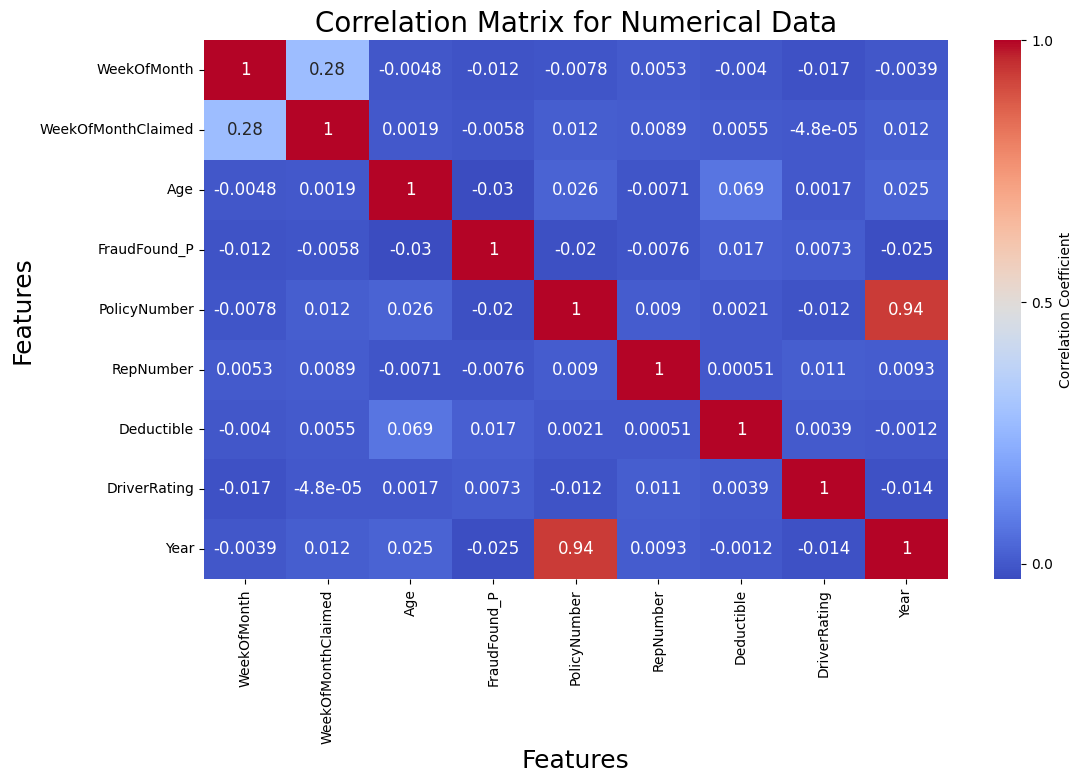

In [134]:
# Correlation matrix for numerical data
plt.figure(figsize=(12, 7))
# Select only numeric columns for correlation matrix
numeric_cols = car_claims.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = car_claims[numeric_cols].corr()
# Create a heatmap with increased font size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={'size': 12}, cbar_kws={'label': 'Correlation Coefficient', 'ticks': [-1, -0.5, 0, 0.5, 1]})

# Set axis labels and title with increased font size
plt.xlabel('Features', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.title('Correlation Matrix for Numerical Data', fontsize=20)

# Show the plot
plt.show()

#### Observations
1. So there isn't really any correlation between numerical features

### 1.3.2 Checking fraud per season

In [135]:
car_claims['Month'].unique()

array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
       'Jul', 'May', 'Sep'], dtype=object)

In [136]:
# Define the mapping of months to seasons
month_to_season = {
    'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter',
    'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
    'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
    'Sep': 'Autumn', 'Oct': 'Autumn', 'Nov': 'Autumn'
}

# Create the 'Season' column
car_claims['Season'] = car_claims['Month'].map(month_to_season)

In [137]:
# counts
season = car_claims['Season'].value_counts().to_frame()
season['fraud_count'] = car_claims[car_claims['FraudFound_P']==1].groupby('Season')['FraudFound_P'].count()

#fraud
season['%_of_total'] = season['count'].apply(lambda x: round(x/season['count'].sum(),2))
season['%_of_fraud'] = season['fraud_count'].apply(lambda x: round(x/season['fraud_count'].sum(),2))

season

,count,fraud_count,%_of_total,%_of_fraud
Season,,,,
Spring,4007,276,0.26,0.30
Winter,3962,231,0.26,0.25
Autumn,3746,192,0.24,0.21
Summer,3705,224,0.24,0.24


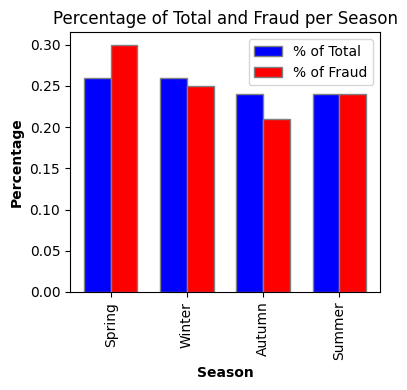

In [138]:
# Define bar width
bar_width = 0.35

# Positions of the bars on the x-axis
r1 = range(len(season))
r2 = [x + bar_width for x in r1]

# Plotting
fig, ax = plt.subplots(figsize=(4, 4))

# Bar plot for the percentage of total
ax.bar(r1, season['%_of_total'], color='blue', width=bar_width, edgecolor='grey', label='% of Total')

# Bar plot for the percentage of fraud
ax.bar(r2, season['%_of_fraud'], color='red', width=bar_width, edgecolor='grey', label='% of Fraud')

# Adding labels and title
ax.set_xlabel('Season', fontweight='bold')
ax.set_ylabel('Percentage', fontweight='bold')
ax.set_title('Percentage of Total and Fraud per Season')
ax.set_xticks([r + bar_width / 2 for r in range(len(season))])
ax.set_xticklabels(season.index)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

#### Observations
1. The distribution of claims per season looks quite equal
2. Spring is the most fraudulent season with 30% of total fraud
3. Autumn is the least fraudulent season with 21% of fraud

### 1.3.3 Heatmap Year vs Month

C:\Users\atans\AppData\Local\Temp\ipykernel_27624\1069510655.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fraud_data = year_month[car_claims['FraudFound_P']==1]


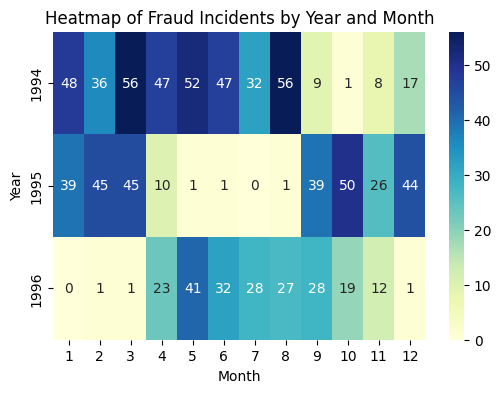

In [139]:
# Aggregate the data to get counts of fraud incidents by year and month

year_month = car_claims.copy()

# Convert the three-letter month abbreviations to a datetime format
year_month['Month'] = pd.to_datetime(year_month['Month'], format='%b').dt.month

# Sort the data by year and month
year_month = year_month.sort_values(by=['Year', 'Month'])

fraud_data = year_month[car_claims['FraudFound_P']==1]

fraud_counts = fraud_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 4))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraud Incidents by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')

plt.show()

#### Observations
1. 1994 looks to be the most fraudulent, especially from Jan till August
2. May-August in 1995 almost don't have fraud in 1995
3. Jan-March and December have almost no fruad in 1996

### 1.3.4 Heatmap Year vs MonthClaimed

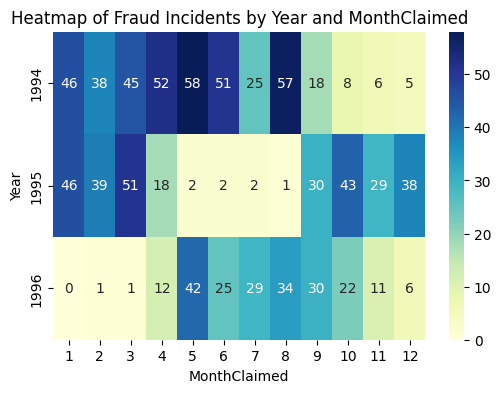

In [140]:
# Aggregate the data to get counts of fraud incidents by year and month

year_month_claimed = car_claims.copy()

year_month_claimed = year_month_claimed[~year_month_claimed['MonthClaimed'].isin(['0'])]

# Convert the three-letter month abbreviations to a datetime format
year_month_claimed['MonthClaimed'] = pd.to_datetime(year_month_claimed['MonthClaimed'], format='%b').dt.month

# Sort the data by year and month
year_month_claimed = year_month_claimed.sort_values(by=['Year', 'MonthClaimed'])

fraud_data = year_month_claimed[year_month_claimed['FraudFound_P']==1]

fraud_counts = fraud_data.groupby(['Year', 'MonthClaimed']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 4))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraud Incidents by Year and MonthClaimed')
plt.xlabel('MonthClaimed')
plt.ylabel('Year')

plt.show()

#### Observations
1. 1994 looks to be the most fraudulent, especially from Jan till August
2. May-August in 1995 almost don't have fraud in 1995
3. Jan-March and December have almost no fruad in 1996
4. Looks pretty similar like the previous one

### 1.3.5 Heatmap Year vs DayOfWeek

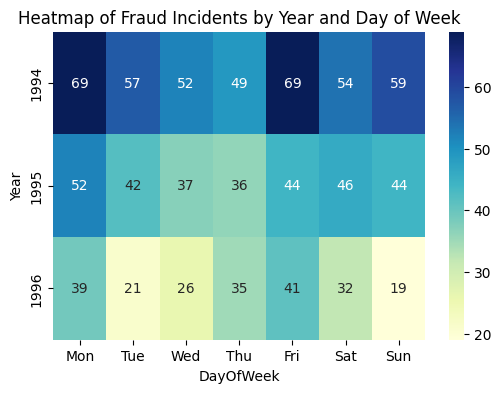

In [141]:
# Map the day names to numeric values
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
year_day = car_claims.copy()

year_day['DayOfWeek_num'] = year_day['DayOfWeek'].map(day_mapping)

# Filter the data to include only fraudulent incidents
fraud_data = year_day[year_day['FraudFound_P'] == 1]

# Aggregate the data to get counts of fraud incidents by year and day of the week
fraud_counts = fraud_data.groupby(['Year', 'DayOfWeek_num']).size().unstack(fill_value=0)

# Convert numeric day values back to day names for the heatmap
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fraud_counts.columns = [day_names[i] for i in fraud_counts.columns]

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraud Incidents by Year and Day of Week')
plt.xlabel('DayOfWeek')
plt.ylabel('Year')

plt.show()

#### Observations
1. 1994 looks to be the most fraudulent, again
2. Monday and Friday are most fraudulent days in terms of only weekday

### 1.3.6 Heatmap Year vs DayOfWeekClaimed

Text(45.722222222222214, 0.5, 'Year')

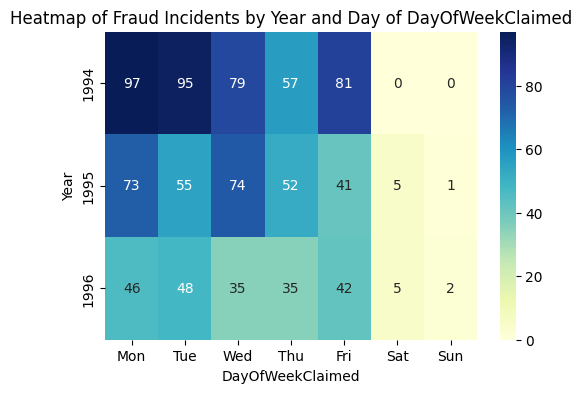

In [142]:
# Map the day names to numeric values
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
year_day_claim = car_claims.copy().dropna(subset=['DayOfWeekClaimed'])

year_day_claim['DayOfWeek_num'] = year_day_claim['DayOfWeekClaimed'].map(day_mapping)

# Filter the data to include only fraudulent incidents
fraud_data = year_day_claim[year_day_claim['FraudFound_P'] == 1]

# Aggregate the data to get counts of fraud incidents by year and day of the week
fraud_counts = fraud_data.groupby(['Year', 'DayOfWeek_num']).size().unstack(fill_value=0)

# Ensure column indices are integers
fraud_counts.columns = fraud_counts.columns.astype(int)

# Convert numeric day values back to day names for the heatmap
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
fraud_counts.columns = [day_names[i] for i in fraud_counts.columns]

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraud Incidents by Year and Day of DayOfWeekClaimed')
plt.xlabel('DayOfWeekClaimed')
plt.ylabel('Year')

#### Observations
1. 1994 looks to be the most fraudulent, again
2. The weekends for claiming seems to not have worked and 1994 is fraudulent every day, a bit less on Thursday

### 1.3.7 Heatmap AgeOfPolicyHolder vs Make

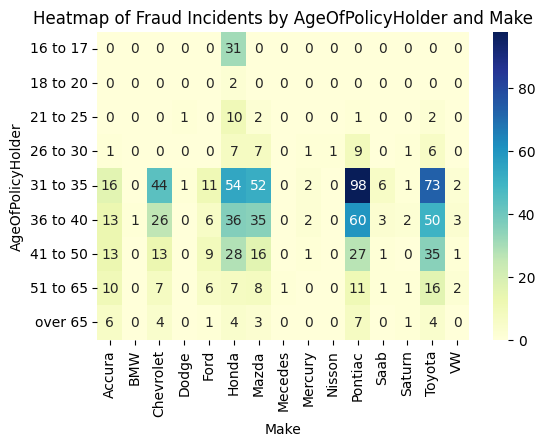

In [143]:
# Aggregate the data to get counts of fraud incidents by year and month

age_make = car_claims.copy()

fraud_data = age_make[age_make['FraudFound_P']==1]

fraud_counts = fraud_data.groupby(['AgeOfPolicyHolder', 'Make']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 4))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraud Incidents by AgeOfPolicyHolder and Make')
plt.xlabel('Make')
plt.ylabel('AgeOfPolicyHolder')

plt.show()

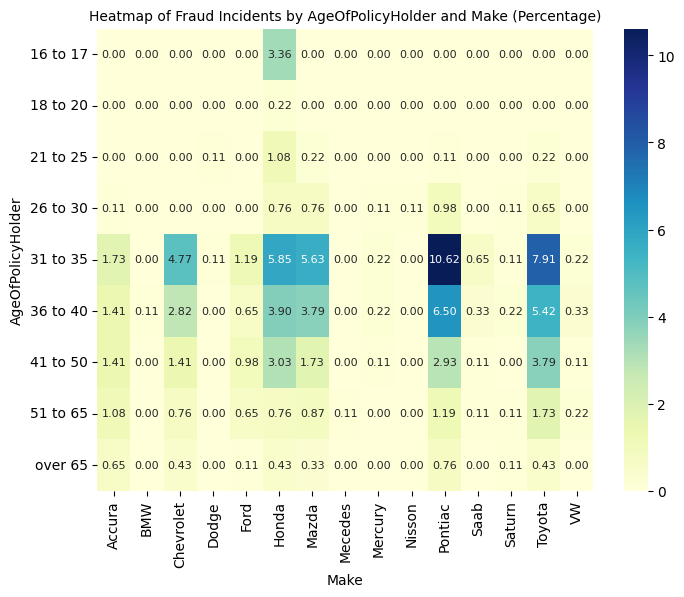

In [144]:
# Aggregate the data to get counts of fraud incidents by age and make
age_make = car_claims.copy()
fraud_data = age_make[age_make['FraudFound_P'] == 1]
fraud_counts = fraud_data.groupby(['AgeOfPolicyHolder', 'Make']).size().unstack(fill_value=0)

# Calculate percentages
total_frauds = fraud_counts.sum().sum()
fraud_percentages = (fraud_counts / total_frauds) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(fraud_percentages, annot=True, fmt=".2f", cmap="YlGnBu", annot_kws={"size": 8})

plt.title('Heatmap of Fraud Incidents by AgeOfPolicyHolder and Make (Percentage)', fontsize=10)
plt.xlabel('Make', fontsize=10)
plt.ylabel('AgeOfPolicyHolder', fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Observations
1. Most of the fraud falls into 31-50 range
2. 31-35 and 36-40 takes up the most
3. Pontiac, Toyota, Honda, Mazda and Chevrolet are makes with most of the fraud

## 1.3.8 Heatmap AgeOfPolicyHolder vs VehiclePrice

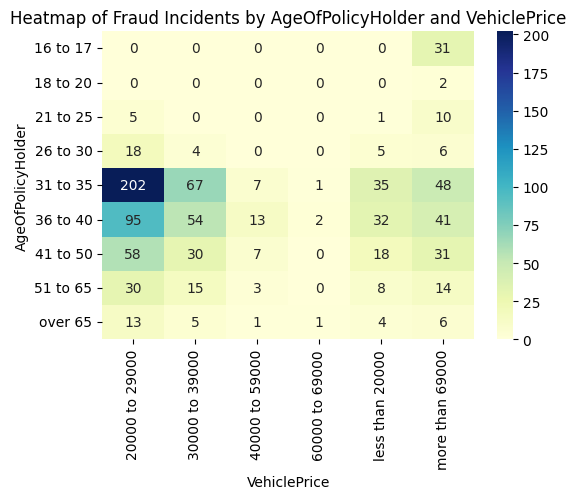

In [145]:
age_price = car_claims.copy()

fraud_data = age_price[age_price['FraudFound_P']==1]

fraud_counts = fraud_data.groupby(['AgeOfPolicyHolder', 'VehiclePrice']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 4))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraud Incidents by AgeOfPolicyHolder and VehiclePrice')
plt.xlabel('VehiclePrice')
plt.ylabel('AgeOfPolicyHolder')


plt.show()

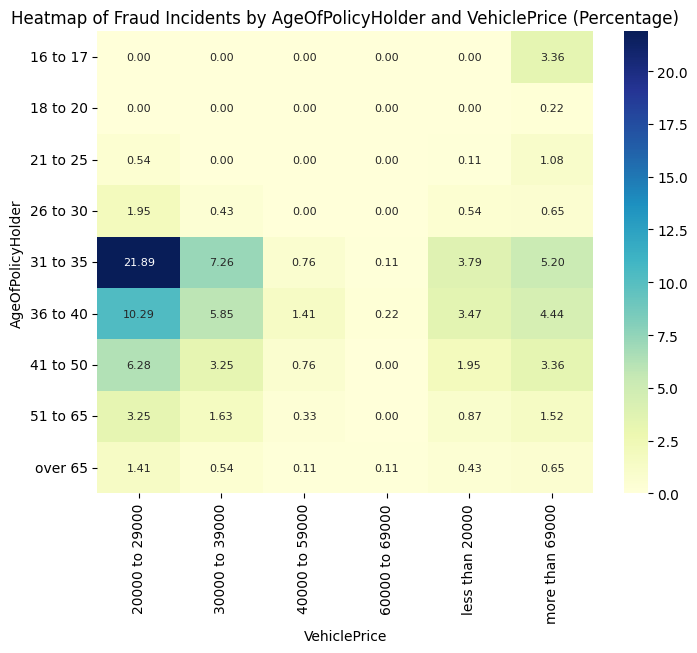

In [146]:
# Aggregate the data to get counts of fraud incidents by age and vehicle price
age_price = car_claims.copy()
fraud_data = age_price[age_price['FraudFound_P'] == 1]
fraud_counts = fraud_data.groupby(['AgeOfPolicyHolder', 'VehiclePrice']).size().unstack(fill_value=0)

# Calculate percentages
total_frauds = fraud_counts.sum().sum()
fraud_percentages = (fraud_counts / total_frauds) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(fraud_percentages, annot=True, fmt=".2f", cmap="YlGnBu", annot_kws={"size": 8})

plt.title('Heatmap of Fraud Incidents by AgeOfPolicyHolder and VehiclePrice (Percentage)', fontsize=12)
plt.xlabel('VehiclePrice', fontsize=10)
plt.ylabel('AgeOfPolicyHolder', fontsize=10)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Observations
1. Almost have of the Fraud falls into the 20000 to 29000 price range
2. 31 to 35 is the most fraudulent age group
3. 16-17 tend to have fraudulent claims on expensive vehicles

## 1.3.9 Heatmap AgeOfPolicyHolder vs AgeOfVehicle

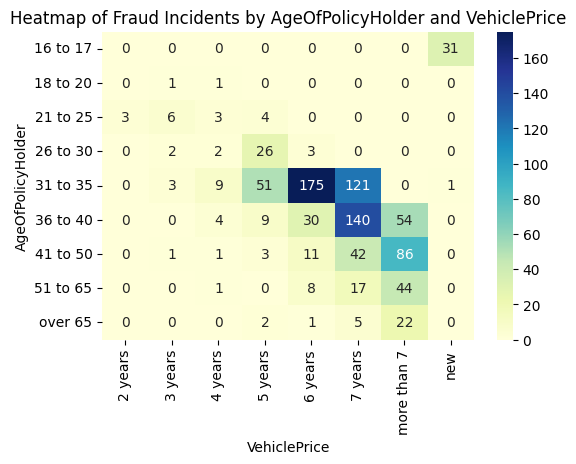

In [147]:
# Aggregate the data to get counts of fraud incidents by year and month

age_car_age = car_claims.copy()

fraud_data = age_car_age[age_car_age['FraudFound_P']==1]

fraud_counts = fraud_data.groupby(['AgeOfPolicyHolder', 'AgeOfVehicle']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 4))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraud Incidents by AgeOfPolicyHolder and VehiclePrice')
plt.xlabel('VehiclePrice')
plt.ylabel('AgeOfPolicyHolder')


plt.show()

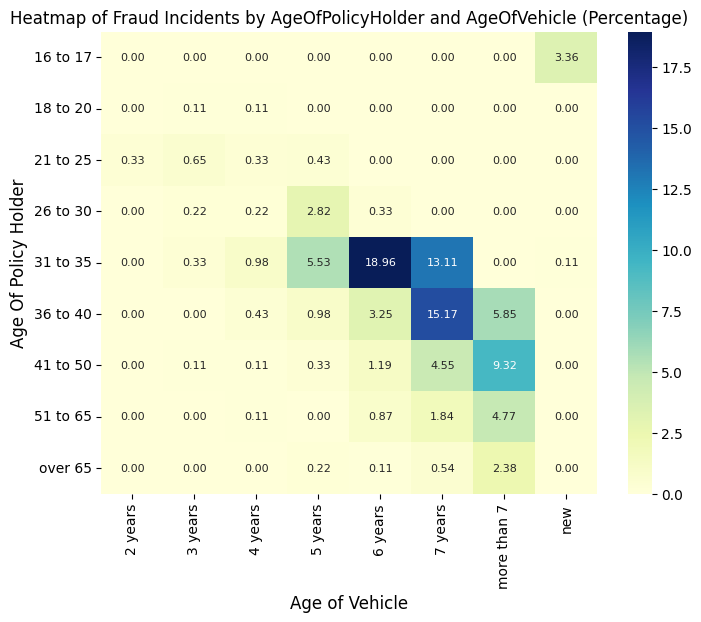

In [148]:
# Aggregate the data to get counts of fraud incidents by age of policyholder and age of vehicle
age_car_age = car_claims.copy()
fraud_data = age_car_age[age_car_age['FraudFound_P'] == 1]
fraud_counts = fraud_data.groupby(['AgeOfPolicyHolder', 'AgeOfVehicle']).size().unstack(fill_value=0)

# Calculate percentages
total_frauds = fraud_counts.sum().sum()
fraud_percentages = (fraud_counts / total_frauds) * 100

plt.figure(figsize=(8, 6))
sns.heatmap(fraud_percentages, annot=True, fmt=".2f", cmap="YlGnBu", annot_kws={"size": 8})

plt.title('Heatmap of Fraud Incidents by AgeOfPolicyHolder and AgeOfVehicle (Percentage)', fontsize=12)
plt.xlabel('Age of Vehicle', fontsize=12)
plt.ylabel('Age Of Policy Holder', fontsize=12)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Observations
1. There are fradulent claims on new vehicles from the young only, 16-17
2. 2 - 4 yo vehicles are way less more likely to fall into fradulent claims

## 1.3.10 Heatmap PolicyType vs Make

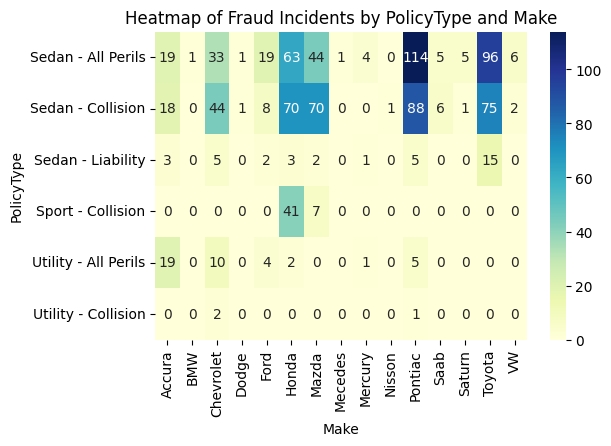

In [149]:
pt_make = car_claims.copy()

fraud_data = pt_make[pt_make['FraudFound_P']==1]

fraud_counts = fraud_data.groupby(['PolicyType', 'Make']).size().unstack(fill_value=0)

plt.figure(figsize=(6, 4))
sns.heatmap(fraud_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Heatmap of Fraud Incidents by PolicyType and Make')
plt.xlabel('Make')
plt.ylabel('PolicyType')


plt.show()

#### Observations
1. 2 policy types are most fraudulent: Sedan - All Perils, Sedan - Liability
2. The same makes can be seen

## 1.3.11 Checking the Age column and comparing it with AgeOfPolicyHolder

In [150]:
car_claims[car_claims['Age']==0]['AgeOfPolicyHolder'].value_counts()

AgeOfPolicyHolder
16 to 17    320
Name: count, dtype: int64

#### Observations
1. We don't have to worry about Age column because we can use AgeOfPolicyHolder column and categorize it

## 1.3.12 Finding any rows with NaNs (there are no rows with None)

In [151]:
car_claims[(car_claims['DayOfWeekClaimed'] == '0')]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Season
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,1517,15,400,2,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,Summer


#### Observations
1. We have one weird row with DayOfWeekClaimed 0 and MonthClaimed 0, apparently, we'll just remove this row and thats it.

# Bottom line

1. We have no Nones in our data
2. No values have to be filled or replaced
3. Only one row contains 0 as strings for 2 columns, we'll drop it
4. The following columns can be dropped as they are quite useless: 'WeekOfMonth', 'DayOfWeek', 'RepNumber', 'PolicyNumber', 'Age' without even checking their importance